# <Span style= 'color: #800020'>CLUSTERING PROJECT : PREDICTING WINE QUALITY 
## <Span style= 'color: #800020'>EXPLORATION NOTEBOOK
* By Annie Carter
* Source: Data World

![WineTasting](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDV68_rdeI70Pn_cjqro69fuq7sTKSEjOS0mKqgDxxQ21j1BmR90ZC8dG1NELsolpDEC4&usqp=CAU)

In [136]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os

import wrangle as w


# Exploring
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
#Clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#Modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score


## <Span style= 'color: #800020'>AQCUIRE AND PREPARE

In [2]:
df_red = pd.read_csv('https://query.data.world/s/cjdbzy2v64s7prdtjzqbpycvvmar5c?dws=00000')

df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

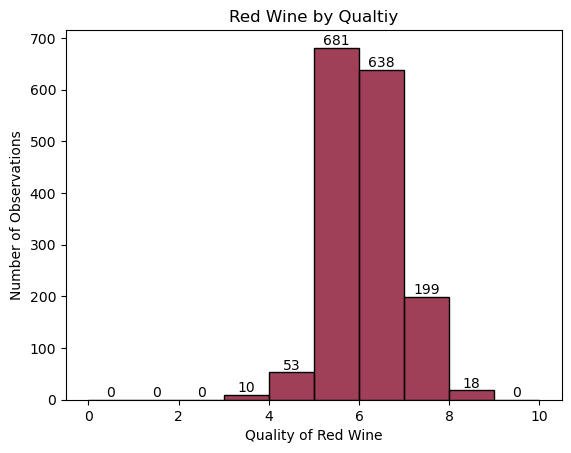

In [3]:
def red_wine():
    '''Red wine graph''' 
    rw = sns.histplot(data=df_red, x='quality', color='#800020', edgecolor='black', bins=range(11), kde=False)
    
    # Set the x-axis label and y-axis label
    plt.xlabel('Quality of Red Wine')
    plt.ylabel('Number of Observations')
    plt.title('Red Wine by Qualtiy')
    
    # Add count numbers on bars
    for p in rw.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        offset = width * 0.02  # Adjust the offset percentage as needed
        rw.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()
red_wine() 

In [4]:
df_white = pd.read_csv('https://query.data.world/s/mymzmddiphbb65cotvuinb2pgyzamt?dws=00000')
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

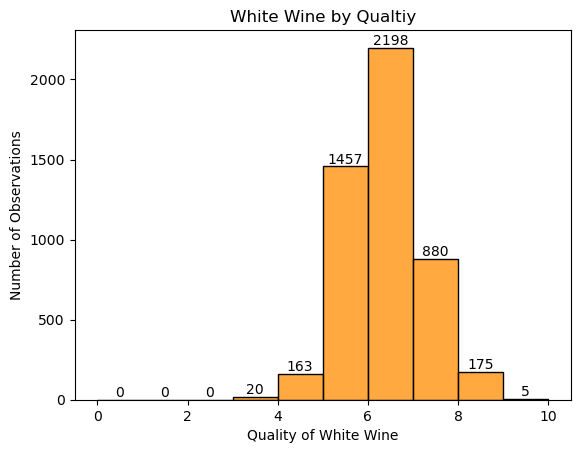

In [5]:
def white_wine():
    ww = sns.histplot(data=df_white, x='quality', color='#FF8C00', edgecolor='black', bins=range(11), kde=False)
    
    # Set the x-axis label and y-axis label
    plt.xlabel('Quality of White Wine')
    plt.ylabel('Number of Observations')
    plt.title('White Wine by Qualtiy')
    for p in ww.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        offset = width * 0.02  # Adjust the offset percentage as needed
        ww.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()
    
white_wine()    

#### Takeaway: White wine  outperforms red wine in quality observations

Concat data

In [6]:
df_red['type'] = 'red'

In [7]:
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [8]:
df_white['type'] = 'white'

In [9]:
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [10]:
frames = [df_white, df_red]

In [11]:
df_wine = pd.concat(frames)
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [12]:
df_red.shape

(1599, 13)

In [13]:
df_white.shape

(4898, 13)

In [14]:
df_wine.shape

(6497, 13)

In [15]:
wine_sample = (df_wine.sample(1000))

In [16]:
wine_sample.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
263             7.9             0.370         0.23             1.8      0.077   
4390            6.2             0.250         0.44            15.8      0.057   
2239            6.9             0.440         0.42             8.5      0.048   
3577            7.3             0.230         0.27             2.6      0.035   
1096            6.6             0.725         0.09             5.5      0.117   
2858            6.9             0.330         0.26             5.0      0.027   
1886            7.0             0.530         0.02             1.0      0.036   
2098            7.4             0.180         0.36            13.1      0.056   
3413            6.7             0.210         0.48            14.8      0.050   
626             7.6             0.560         0.12            10.4      0.096   
2615            6.5             0.180         0.41            14.2      0.039   
4695            6.7             0.350         0.32             9.0      0.032   
2246            6.4             0.340         0.20            14.9      0.060   
1390            5.9             0.190         0.26             7.4      0.034   
879             7.2             0.600         0.04             2.5      0.076   
4388            6.7             0.260         0.29             7.1      0.036   
3093            7.0             0.250         0.45             2.3      0.045   
3737            7.1             0.210         0.72             1.6      0.167   
2770            6.4             0.440         0.44            14.4      0.048   
913             9.4             0.395         0.46             4.6      0.094   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
263                  23.0                  49.0  0.99630  3.28       0.67   
4390                 39.0                 167.0  0.99804  3.14       0.51   
2239                 10.0                 147.0  0.99740  3.32       0.46   
3577                 39.0                 120.0  0.99138  3.04       0.59   
1096                  9.0                  17.0  0.99655  3.35       0.49   
2858                 46.0                 143.0  0.99240  3.25       0.43   
1886                 39.0                 107.0  0.99300  3.20       0.32   
2098                 72.0                 163.0  1.00000  3.42       0.35   
3413                 31.0                 195.0  0.99942  2.95       0.75   
626                  22.0                 177.0  0.99830  3.32       0.45   
2615                 47.0                 129.0  0.99678  3.28       0.72   
4695                 29.0                 113.0  0.99188  3.13       0.65   
2246                 37.0                 162.0  0.99830  3.13       0.45   
1390                 33.0                 123.0  0.99500  3.49       0.42   
879                  18.0                  88.0  0.99745  3.53       0.55   
4388                 28.0                 100.0  0.99534  3.08       0.36   
3093                 40.0                 118.0  0.99064  3.16       0.48   
3737                 65.0                 120.0  0.99324  2.97       0.51   
2770                 29.0                 228.0  0.99955  3.26       0.54   
913                   3.0                  10.0  0.99639  3.27       0.64   

      alcohol  quality   type  
263       9.3        5    red  
4390      9.2        5  white  
2239      9.5        6  white  
3577     11.3        7  white  
1096     10.8        6    red  
2858     11.2        7  white  
1886      9.0        5  white  
2098      9.1        6  white  
3413      8.8        6  white  
626       9.1        4  white  
2615     10.3        7  white  
4695     12.9        7  white  
2246      9.0        4  white  
1390     10.1        6  white  
879       9.5        5    red  
4388      9.3        6  white  
3093     11.9        7  white  
3737      9.2        5  white  
2770      8.8        7  white  
913      12.2        7    red

In [17]:
wine_corr = df_wine.corr()['quality'].sort_values(ascending=False)
wine_corr

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

Feature observation correlated that ETOH associated with good quality and  chlorides, volatile acidity, and density associated with poor quality wines.

In [18]:
df_wine.isnull()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1594                False                 False    False  False      False   
1595                False                 False    False  False      False   
1596                False                 False    False  False      False   
1597                False                 False    False  False      False   
1598                False                 False    False  False      False   

      alcohol  quality   type  
0       False    False  False  
1       False    False  False  
2       False    False  False  
3       False    False  False  
4       False    False  False  
...       ...      ...    ...  
1594    False    False  False  
1595    False    False  False  
1596    False    False  False  
1597    False    False  False  
1598    False    False  False  

[6497 rows x 13 columns]

In [19]:
def get_wine_data():
    '''This function creates a csv for concat wine csv'''
    # Assuming you have a function 'get_wine()' that retrieves the wine data and returns a DataFrame
    df_wine2 = df_wine

    # Save the DataFrame to a CSV file
    df_wine.to_csv("wine.csv", index=False)  # Specify 'index=False' to exclude the index column in the CSV

    filename = 'wine.csv'
    if os.path.isfile(filename):
        return pd.read_csv(filename)

get_wine_data()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality   type  
0         8.8        6  white  
1         9.5        6  white  
2        10.1        6  white  
3         9.9        6  white  
4         9.9        6  white  
...       ...      ...    ...  
6492     10.5        5    red  
6493     11.2        6    red  
6494     11.0        6    red  
6495     10.2        5    red  
6496     11.0        6    red  

[6497 rows x 13 columns]

In [20]:
df_wine.shape

(6497, 13)

Make df_wine.csv

In [21]:
def hot_wine():
    # Create one-hot encoding for the "type" column
    wine_type_df = pd.get_dummies(df_wine['type'],  prefix='Yes', drop_first=True)
    
    # Concatenate the DataFrames df and wine_type_df
    wine_df = pd.concat([df_wine, wine_type_df], axis=1)
    # Drop the original 'type' column
    wine_df.drop(columns=['type'], inplace=True)
    
    #Make Yes_wine data type int
    wine_df['Yes_white'] = wine_df['Yes_white'].astype(int)
    return wine_df
hot_wine()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  Yes_white  
0         8.8        6          1  
1         9.5        6          1  
2        10.1        6          1  
3         9.9        6          1  
4         9.9        6          1  
...       ...      ...        ...  
1594     10.5        5          0  
1595     11.2        6          0  
1596     11.0        6          0  
1597     10.2        5          0  
1598     11.0        6          0  

[6497 rows x 13 columns]

In [22]:
wine_df = hot_wine()

In [23]:
wine_df.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  Yes_white  
0      8.8        6          1  
1      9.5        6          1

In [24]:
#check for missing data (nulls) in df 
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Yes_white               0
dtype: int64

### <Span style= 'color: #800020'> INITIAL EXPLORATION

In [25]:
wine_df.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
Yes_white             6497.0    0.753886   0.430779  0.00000   1.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000  
Yes_white               1.00000    1.00000    1.00000

In [26]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Yes_white             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2400x2400 with 0 Axes>

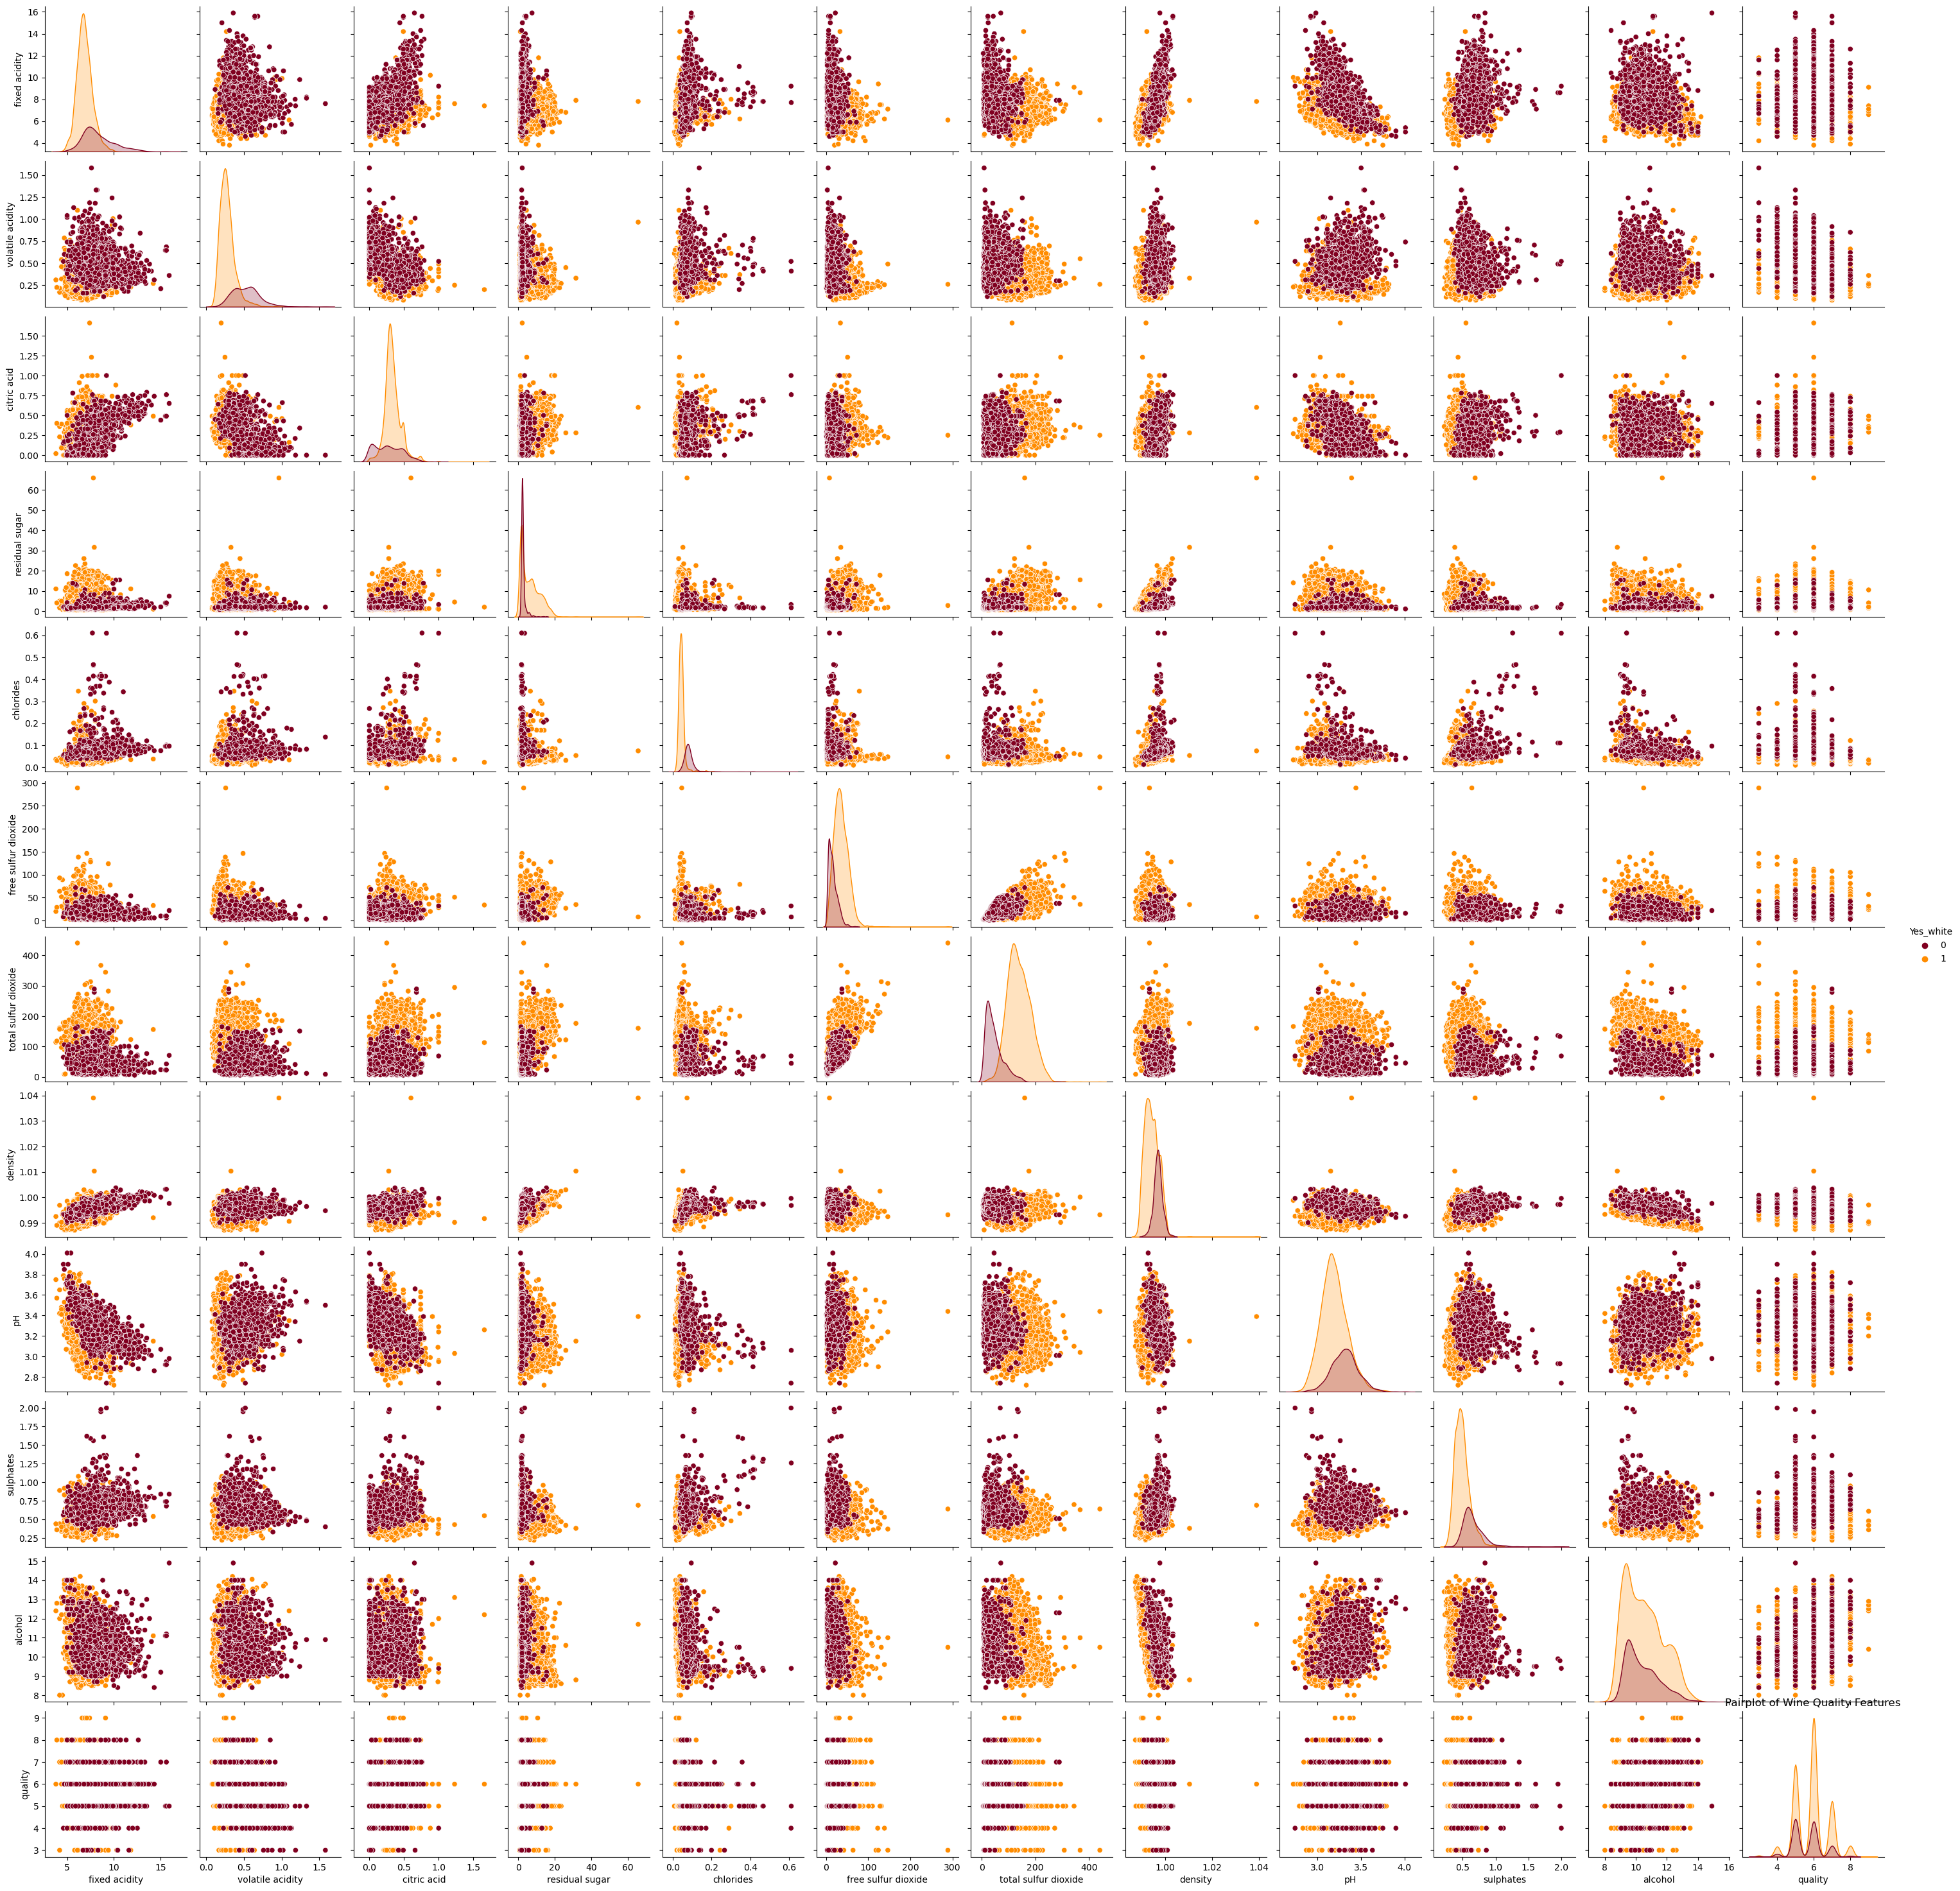

In [27]:
# Pairplot of features to determine which ones will best represent the data and questions asked?
custom_palette = ['#800020', '#FF8C00']
plt.figure(figsize=(24, 24))
sns.pairplot(wine_df, hue = "Yes_white", palette=custom_palette)
plt.title("Pairplot of Wine Quality Features")
plt.show

In [28]:
#Exploring Yes_white 
wine_df.Yes_white.value_counts()

1    4898
0    1599
Name: Yes_white, dtype: int64

In [29]:
wine_df.pH.value_counts()

3.16    200
3.14    193
3.22    185
3.20    176
3.19    170
       ... 
2.72      1
3.85      1
3.82      1
3.81      1
3.79      1
Name: pH, Length: 108, dtype: int64

In [30]:
wine_df.quality.value_counts()


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [31]:
wine_df.density.value_counts().unique()

array([69, 64, 63, 61, 59, 55, 54, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43,
       41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 30, 29, 28, 27, 26, 25, 24,
       22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1])

In [32]:
wine_df['density'].describe()

count    6497.000000
mean        0.994697
std         0.002999
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.038980
Name: density, dtype: float64

In [33]:
wine_df.alcohol.value_counts().unique()


array([367, 332, 271, 229, 227, 217, 215, 214, 194, 193, 187, 177, 176,
       167, 161, 159, 158, 153, 148, 142, 137, 133, 123, 118, 110, 109,
       104,  98,  95,  89,  81,  80,  74,  73,  71,  69,  65,  64,  61,
        48,  42,  23,  20,  15,  13,  12,  10,   7,   5,   4,   3,   2,
         1])

In [34]:
wine_df['alcohol'].describe()


count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [35]:
wine_df.chlorides.value_counts().unique()

array([206, 200, 187, 185, 182, 175, 174, 169, 161, 160, 151, 142, 141,
       135, 130, 119, 116, 114, 112, 109, 108, 107,  97,  85,  81,  78,
        70,  69,  67,  63,  62,  60,  58,  54,  53,  52,  50,  49,  48,
        47,  45,  42,  41,  40,  39,  37,  35,  34,  31,  30,  28,  26,
        25,  24,  23,  20,  19,  17,  16,  15,  13,  12,  11,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1])

In [36]:
wine_df['chlorides'].describe()


count    6497.000000
mean        0.056034
std         0.035034
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64

In [37]:
wine_df.sulphates.value_counts().unique()

array([276, 243, 235, 232, 214, 208, 203, 197, 191, 190, 186, 172, 169,
       168, 167, 166, 157, 152, 148, 139, 138, 131, 129, 120, 113,  96,
        90,  85,  84,  79,  78,  71,  69,  61,  60,  54,  53,  45,  44,
        42,  38,  35,  34,  31,  24,  20,  17,  16,  15,  14,  13,  10,
         8,   7,   6,   5,   4,   3,   2,   1])

In [38]:
wine_df['sulphates'].describe()

count    6497.000000
mean        0.531268
std         0.148806
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

## <Span style= 'color: #800020'>Initial questions 
1. Does alcohol have a relationship with wine quality?
2. Does density have a relationship with wine quality? 
3. Does chlorides have a relationship with wine quality?
4. Does category of wine "red or white" have a relationship to wine quality?

In [39]:
def split_wine(df):
    df= wine_df
    train, wine_test = train_test_split(wine_df, test_size=0.2, random_state=210)
    wine_train, wine_validate = train_test_split(train, test_size=0.25, random_state=210)   
    return wine_train, wine_validate, wine_test

In [40]:
wine_train, wine_validate, wine_test = split_wine(wine_df)
print(f'Training set shape: {wine_train.shape}')
print(f'Validation set shape: {wine_validate.shape}')
print(f'Test set shape: {wine_test.shape}')

Training set shape: (3897, 13)
Validation set shape: (1300, 13)
Test set shape: (1300, 13)


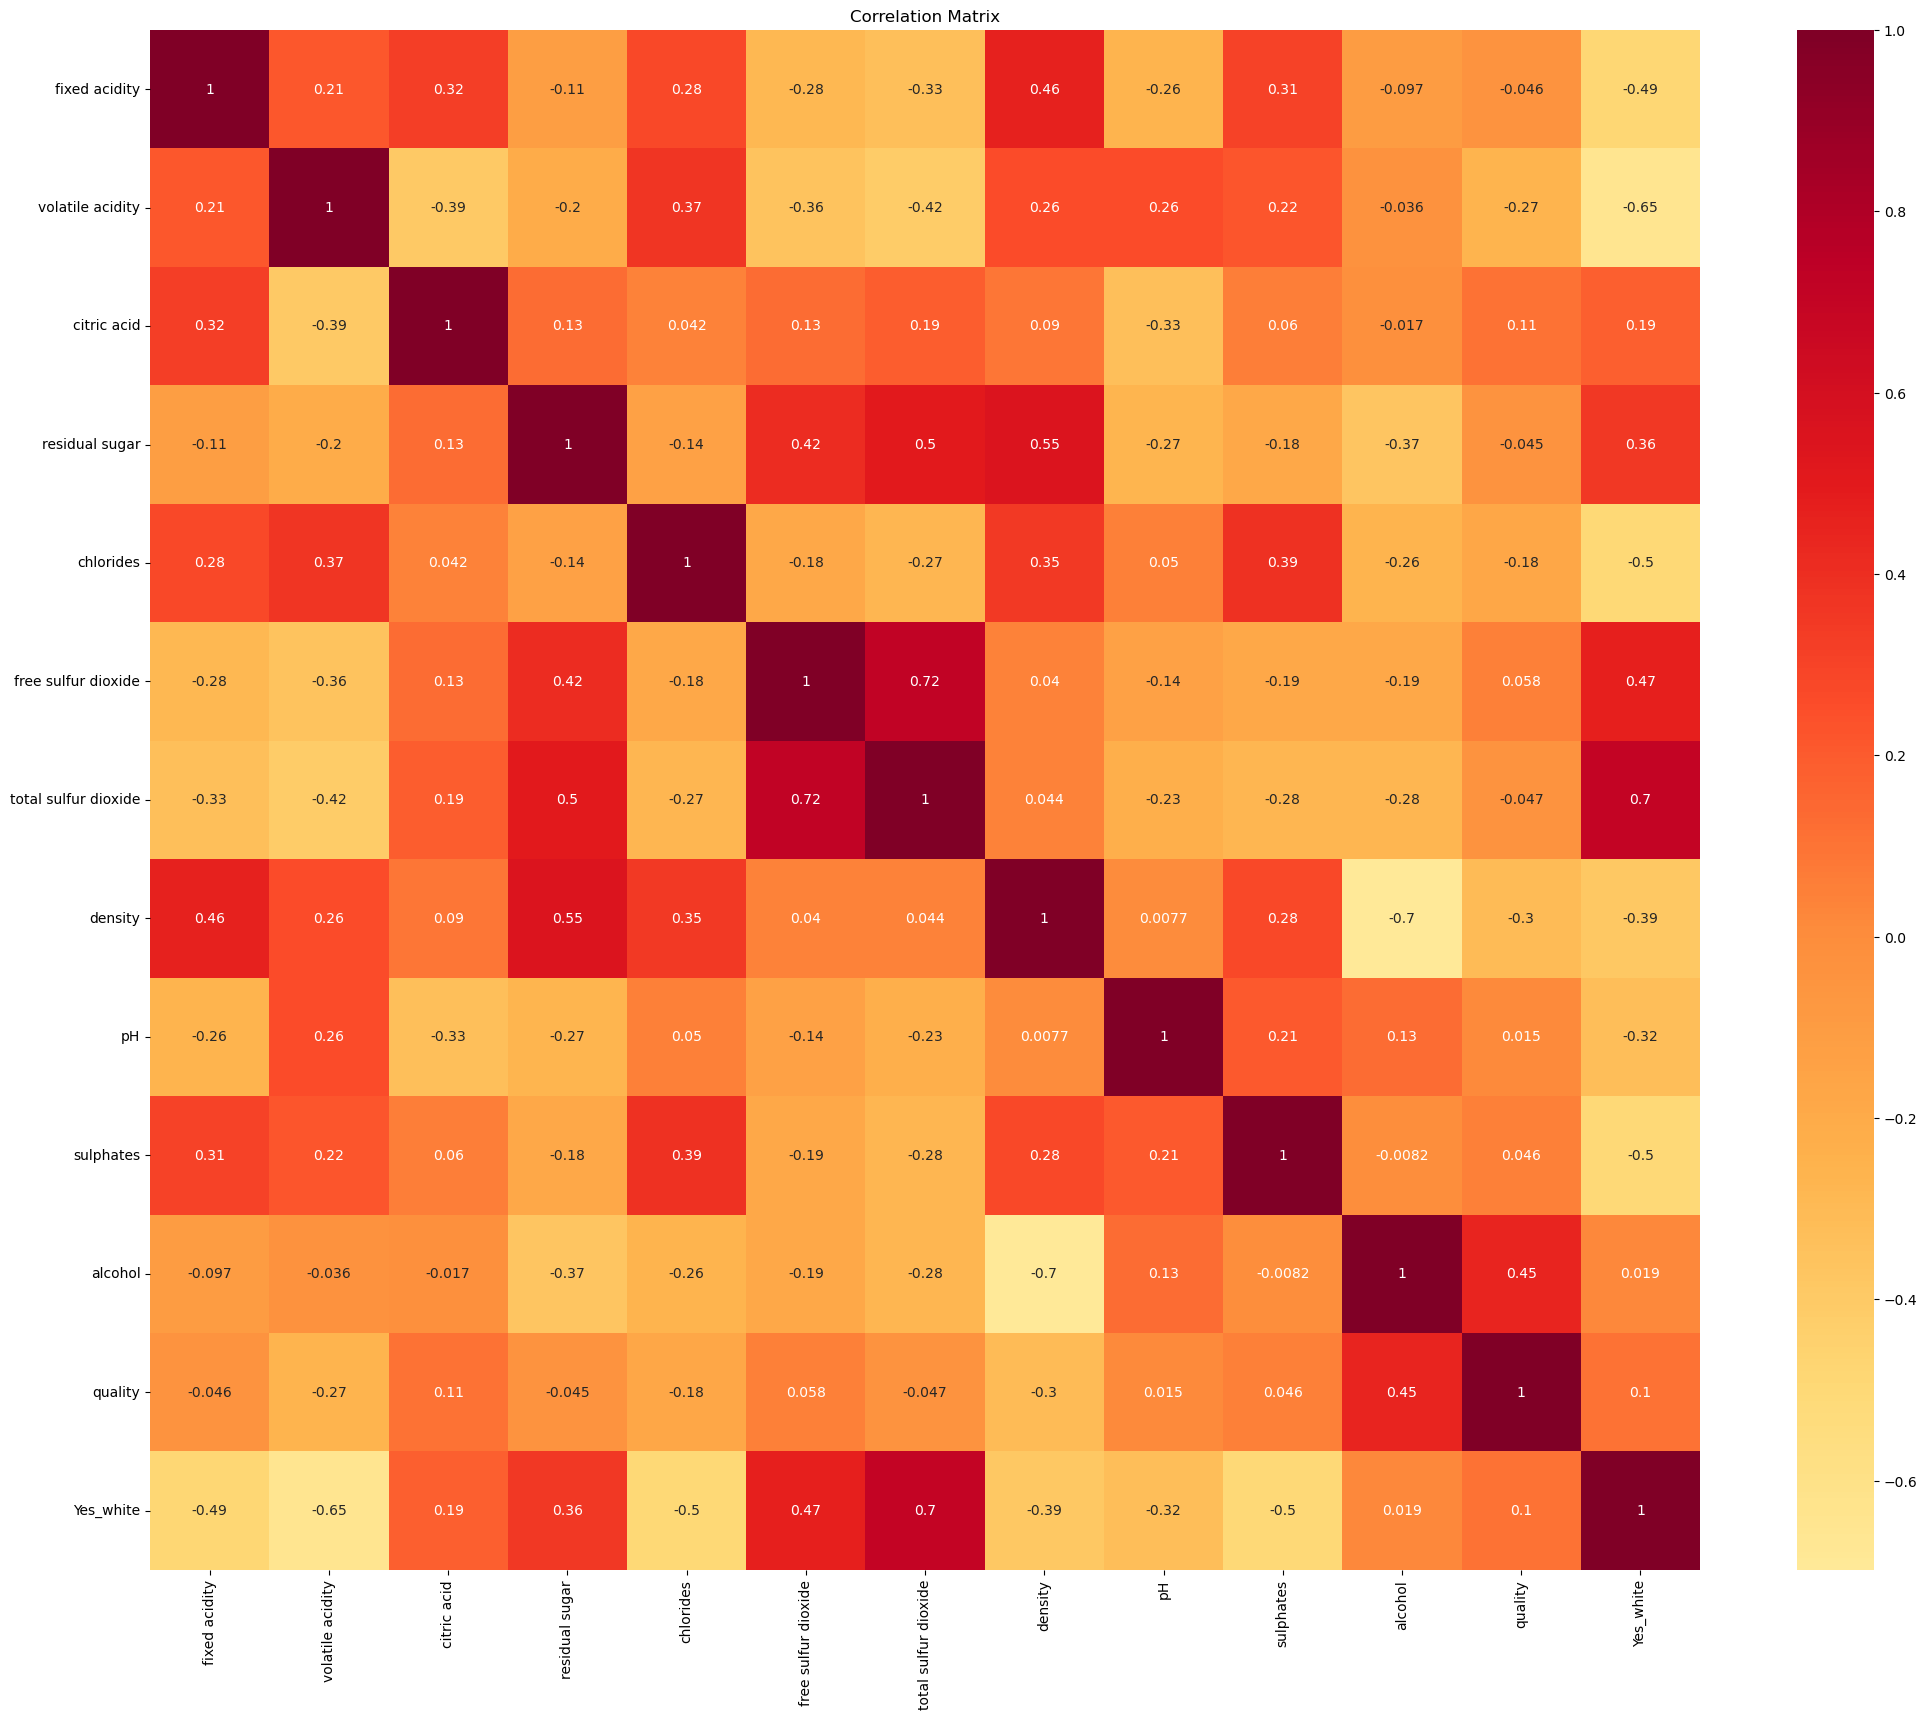

In [41]:
plt.figure(figsize=(25, 20))
sns.heatmap(wine_train.corr(), cmap='YlOrRd', center=0, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [42]:
#Explore correlation data by churn
train_correlation = wine_train.corr().style.format("{:1.0%}")
train_correlation

### <Span style= 'color: #800020'>SCALING PERFORMED

In [119]:
to_scale = ['volatile acidity', 'chlorides', 'density','Yes_wine']

In [128]:
#CodeUp visualize scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,QuantileTransformer

def visualize_scaler(scaler, df, features_to_scale, bins=50):
    features_to_scale = ['volatile acidity', 'chlorides', 'density']
    #create subplot structure
    fig, axs = plt.subplots(len(features_to_scale), 2, figsize=(24, 24,))
    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), feature in zip(axs, features_to_scale):
        ax1.hist(df[feature], bins=bins, color='#E97451')
        ax1.set(title=f'{feature} before scaling', xlabel=feature, ylabel='count',)
    
        ax2.hist(df[feature], bins=bins, color='#E97451')
        ax2.set(title=f'{feature} after scaling with {scaler.__class__.__name__}', xlabel=feature, ylabel='count')
    plt.tight_layout()

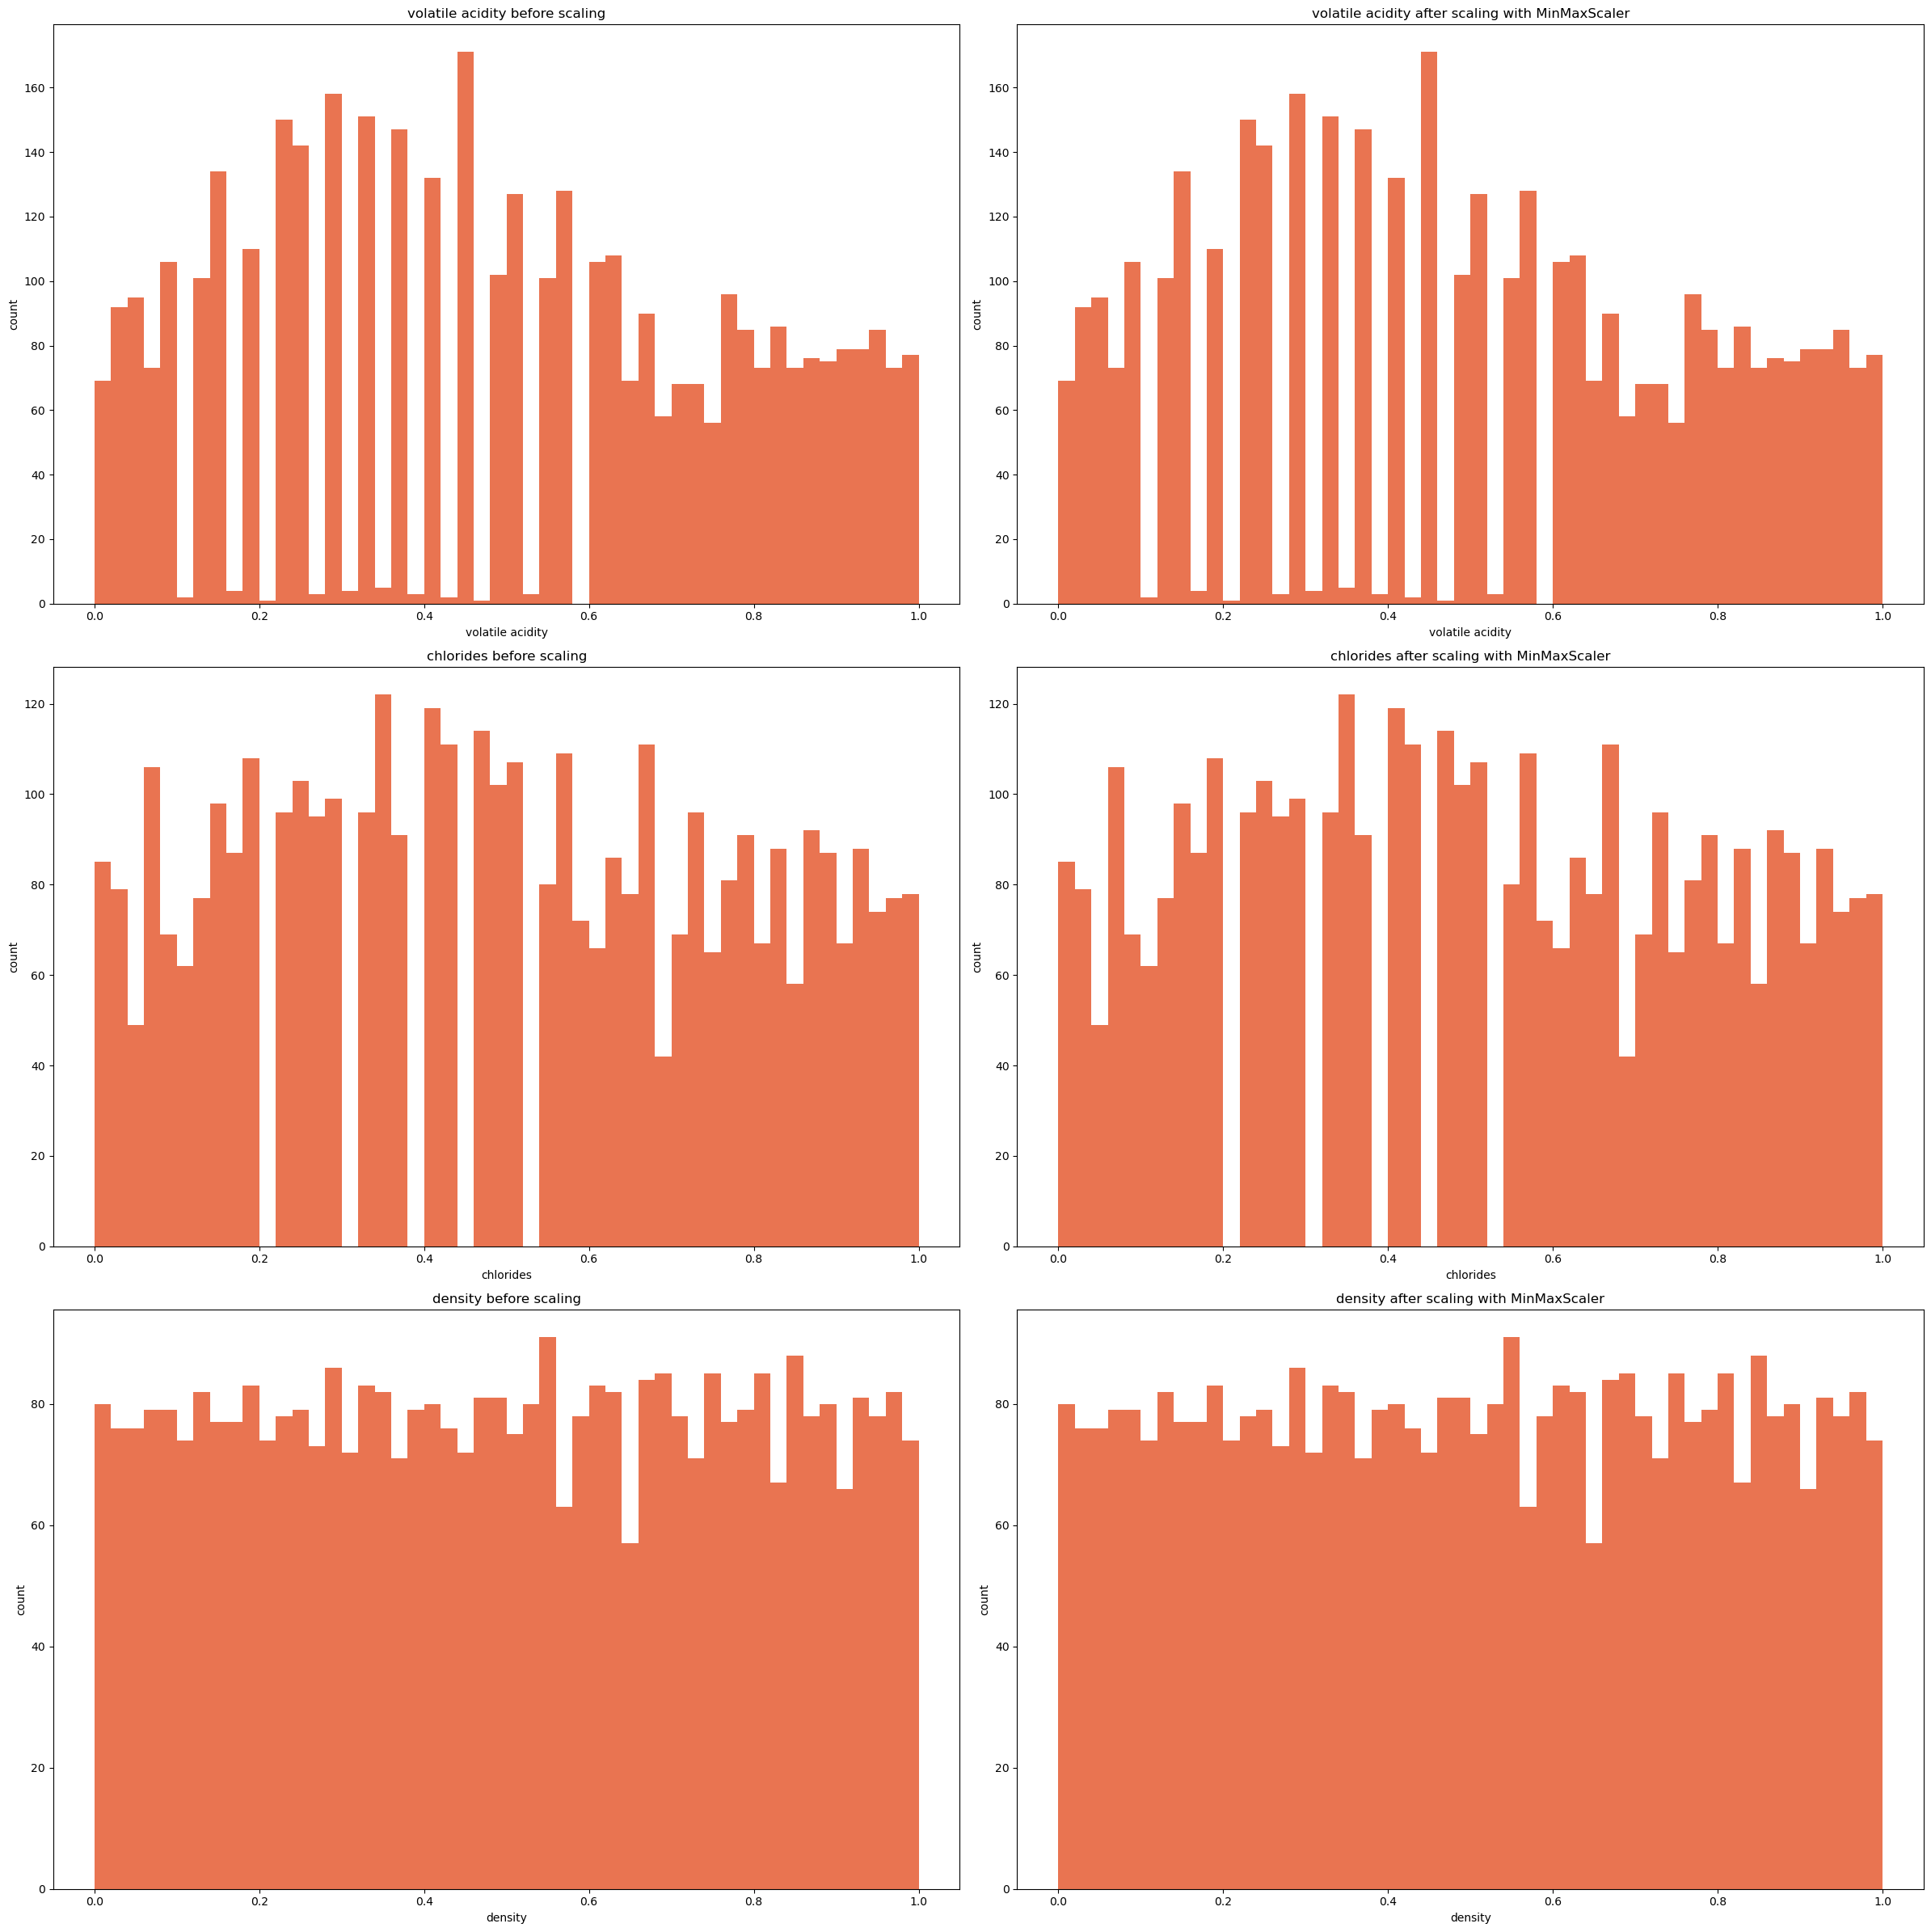

In [122]:
# call function with minmax
mm_scaler = MinMaxScaler()
visualize_scaler(scaler=mm_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

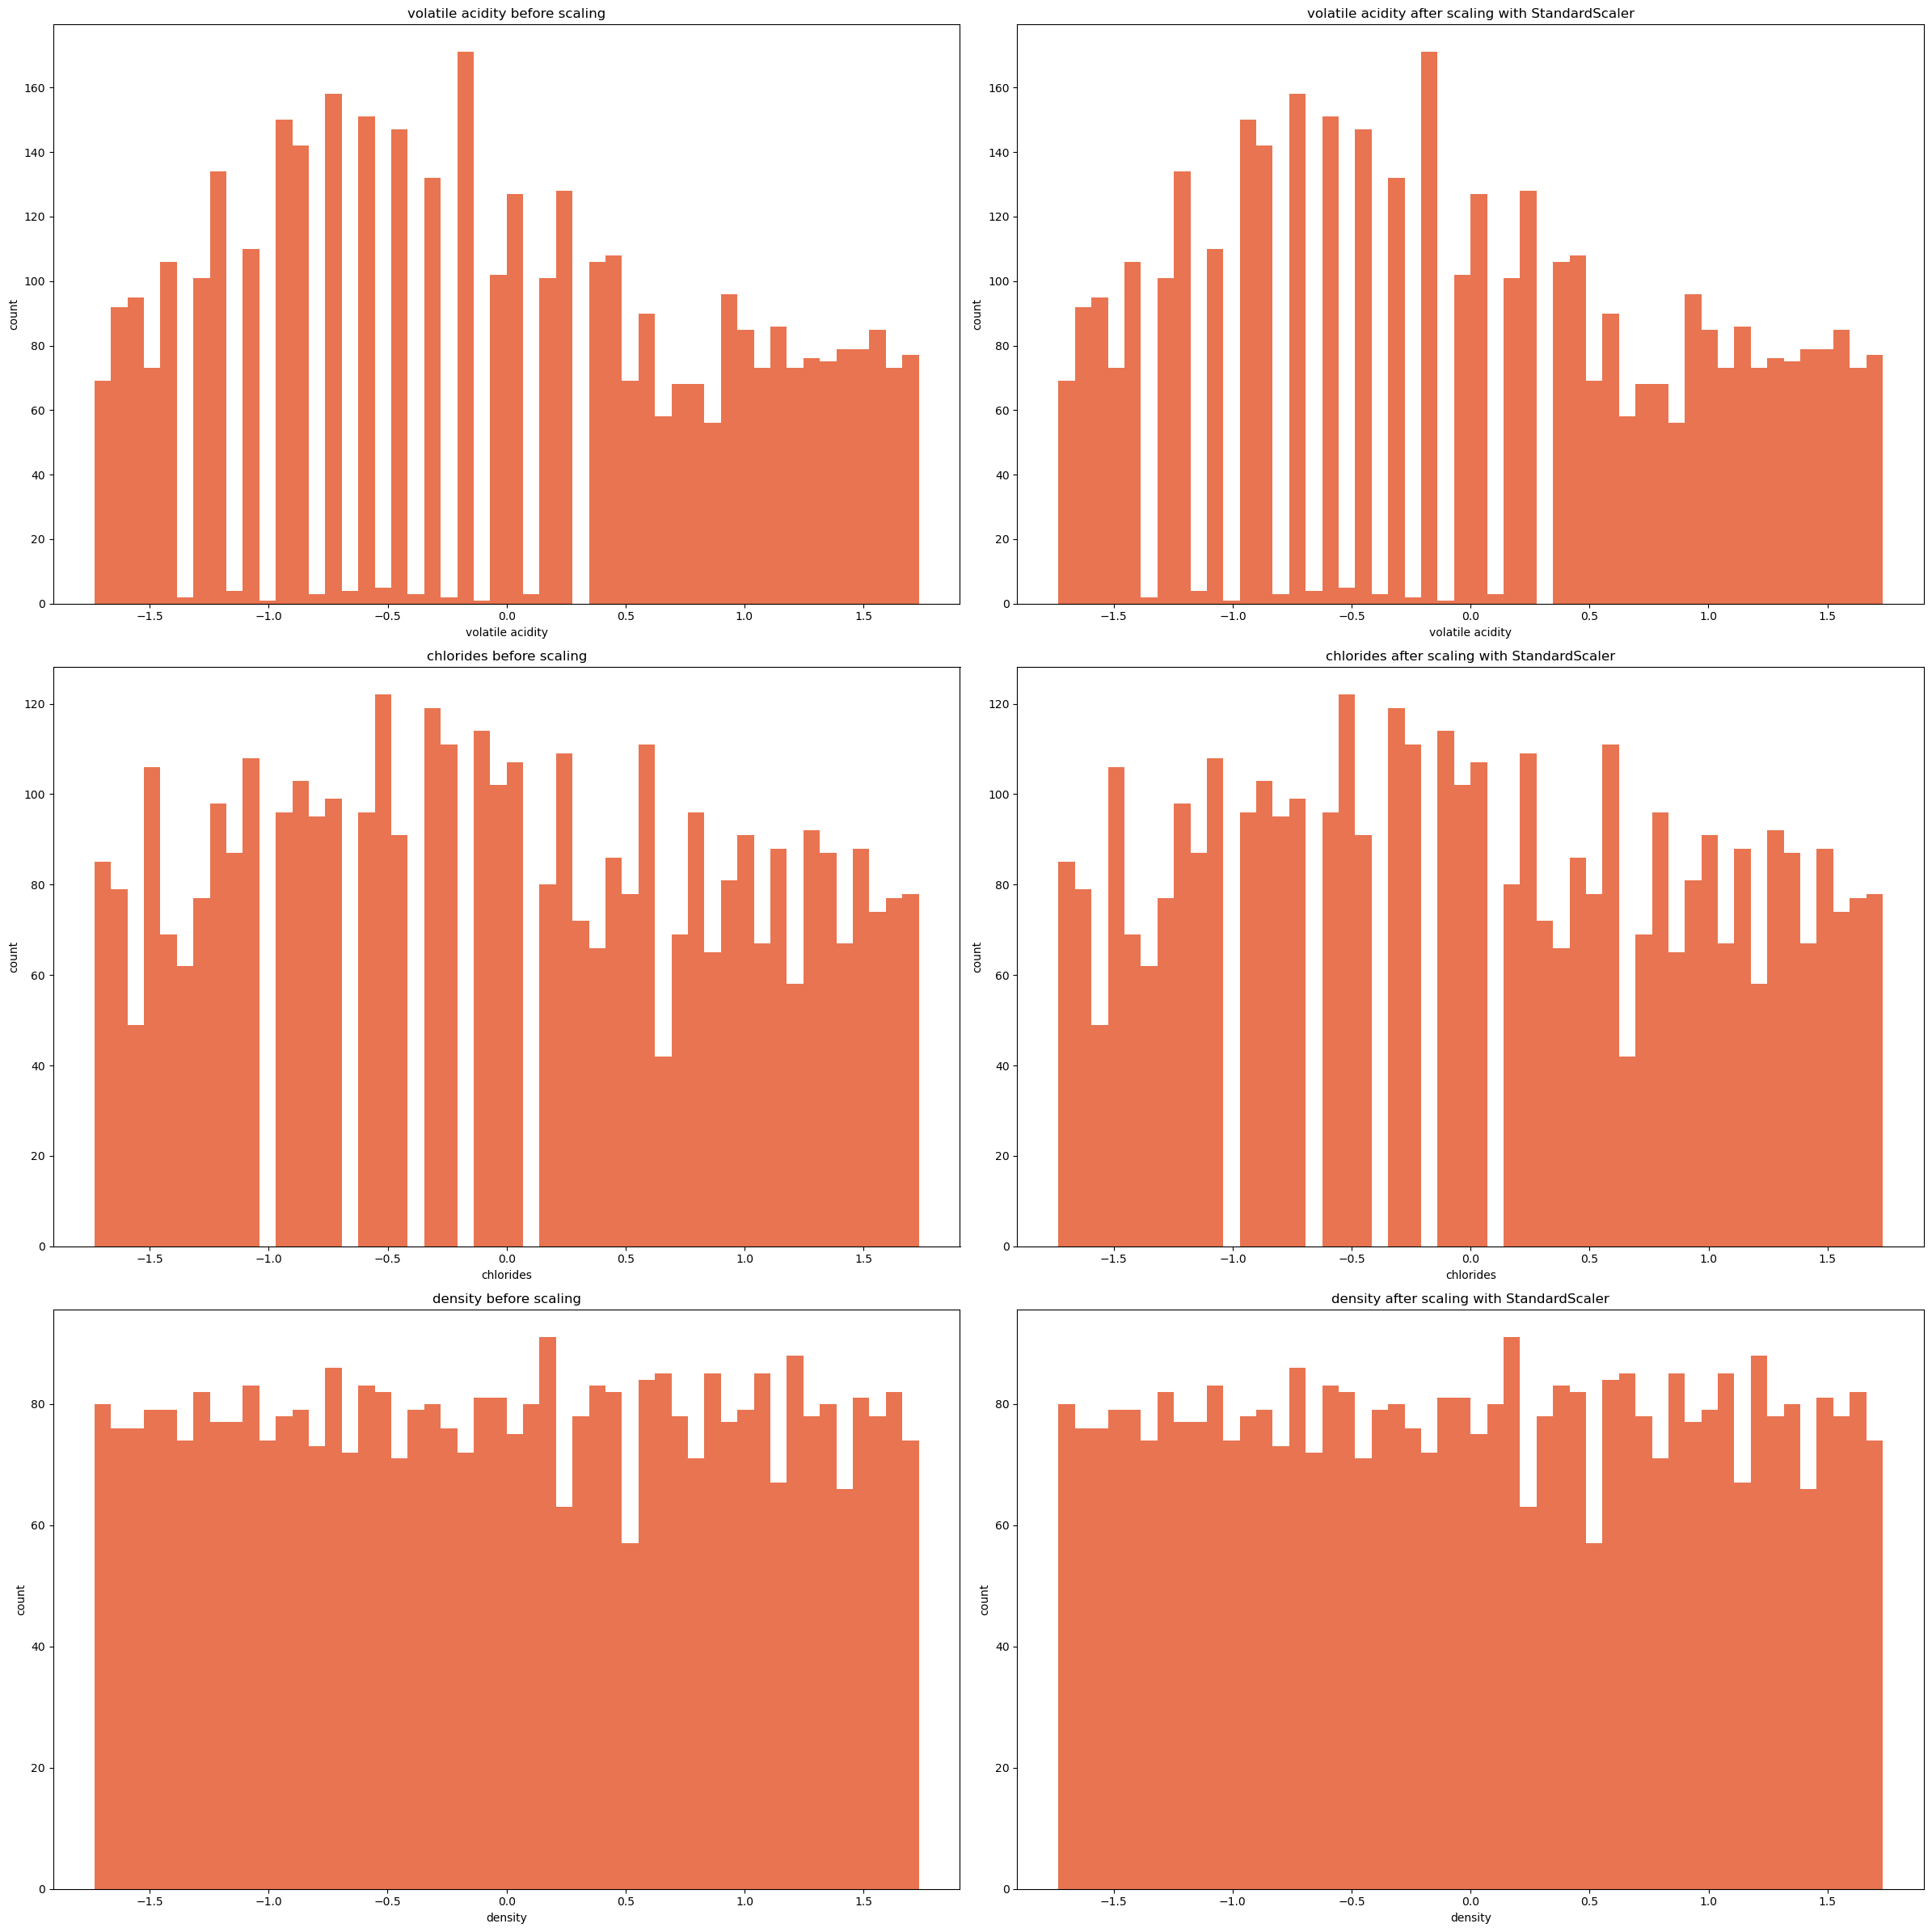

In [131]:
# call function with standardscaler
standard_scaler = StandardScaler()
visualize_scaler(scaler=standard_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

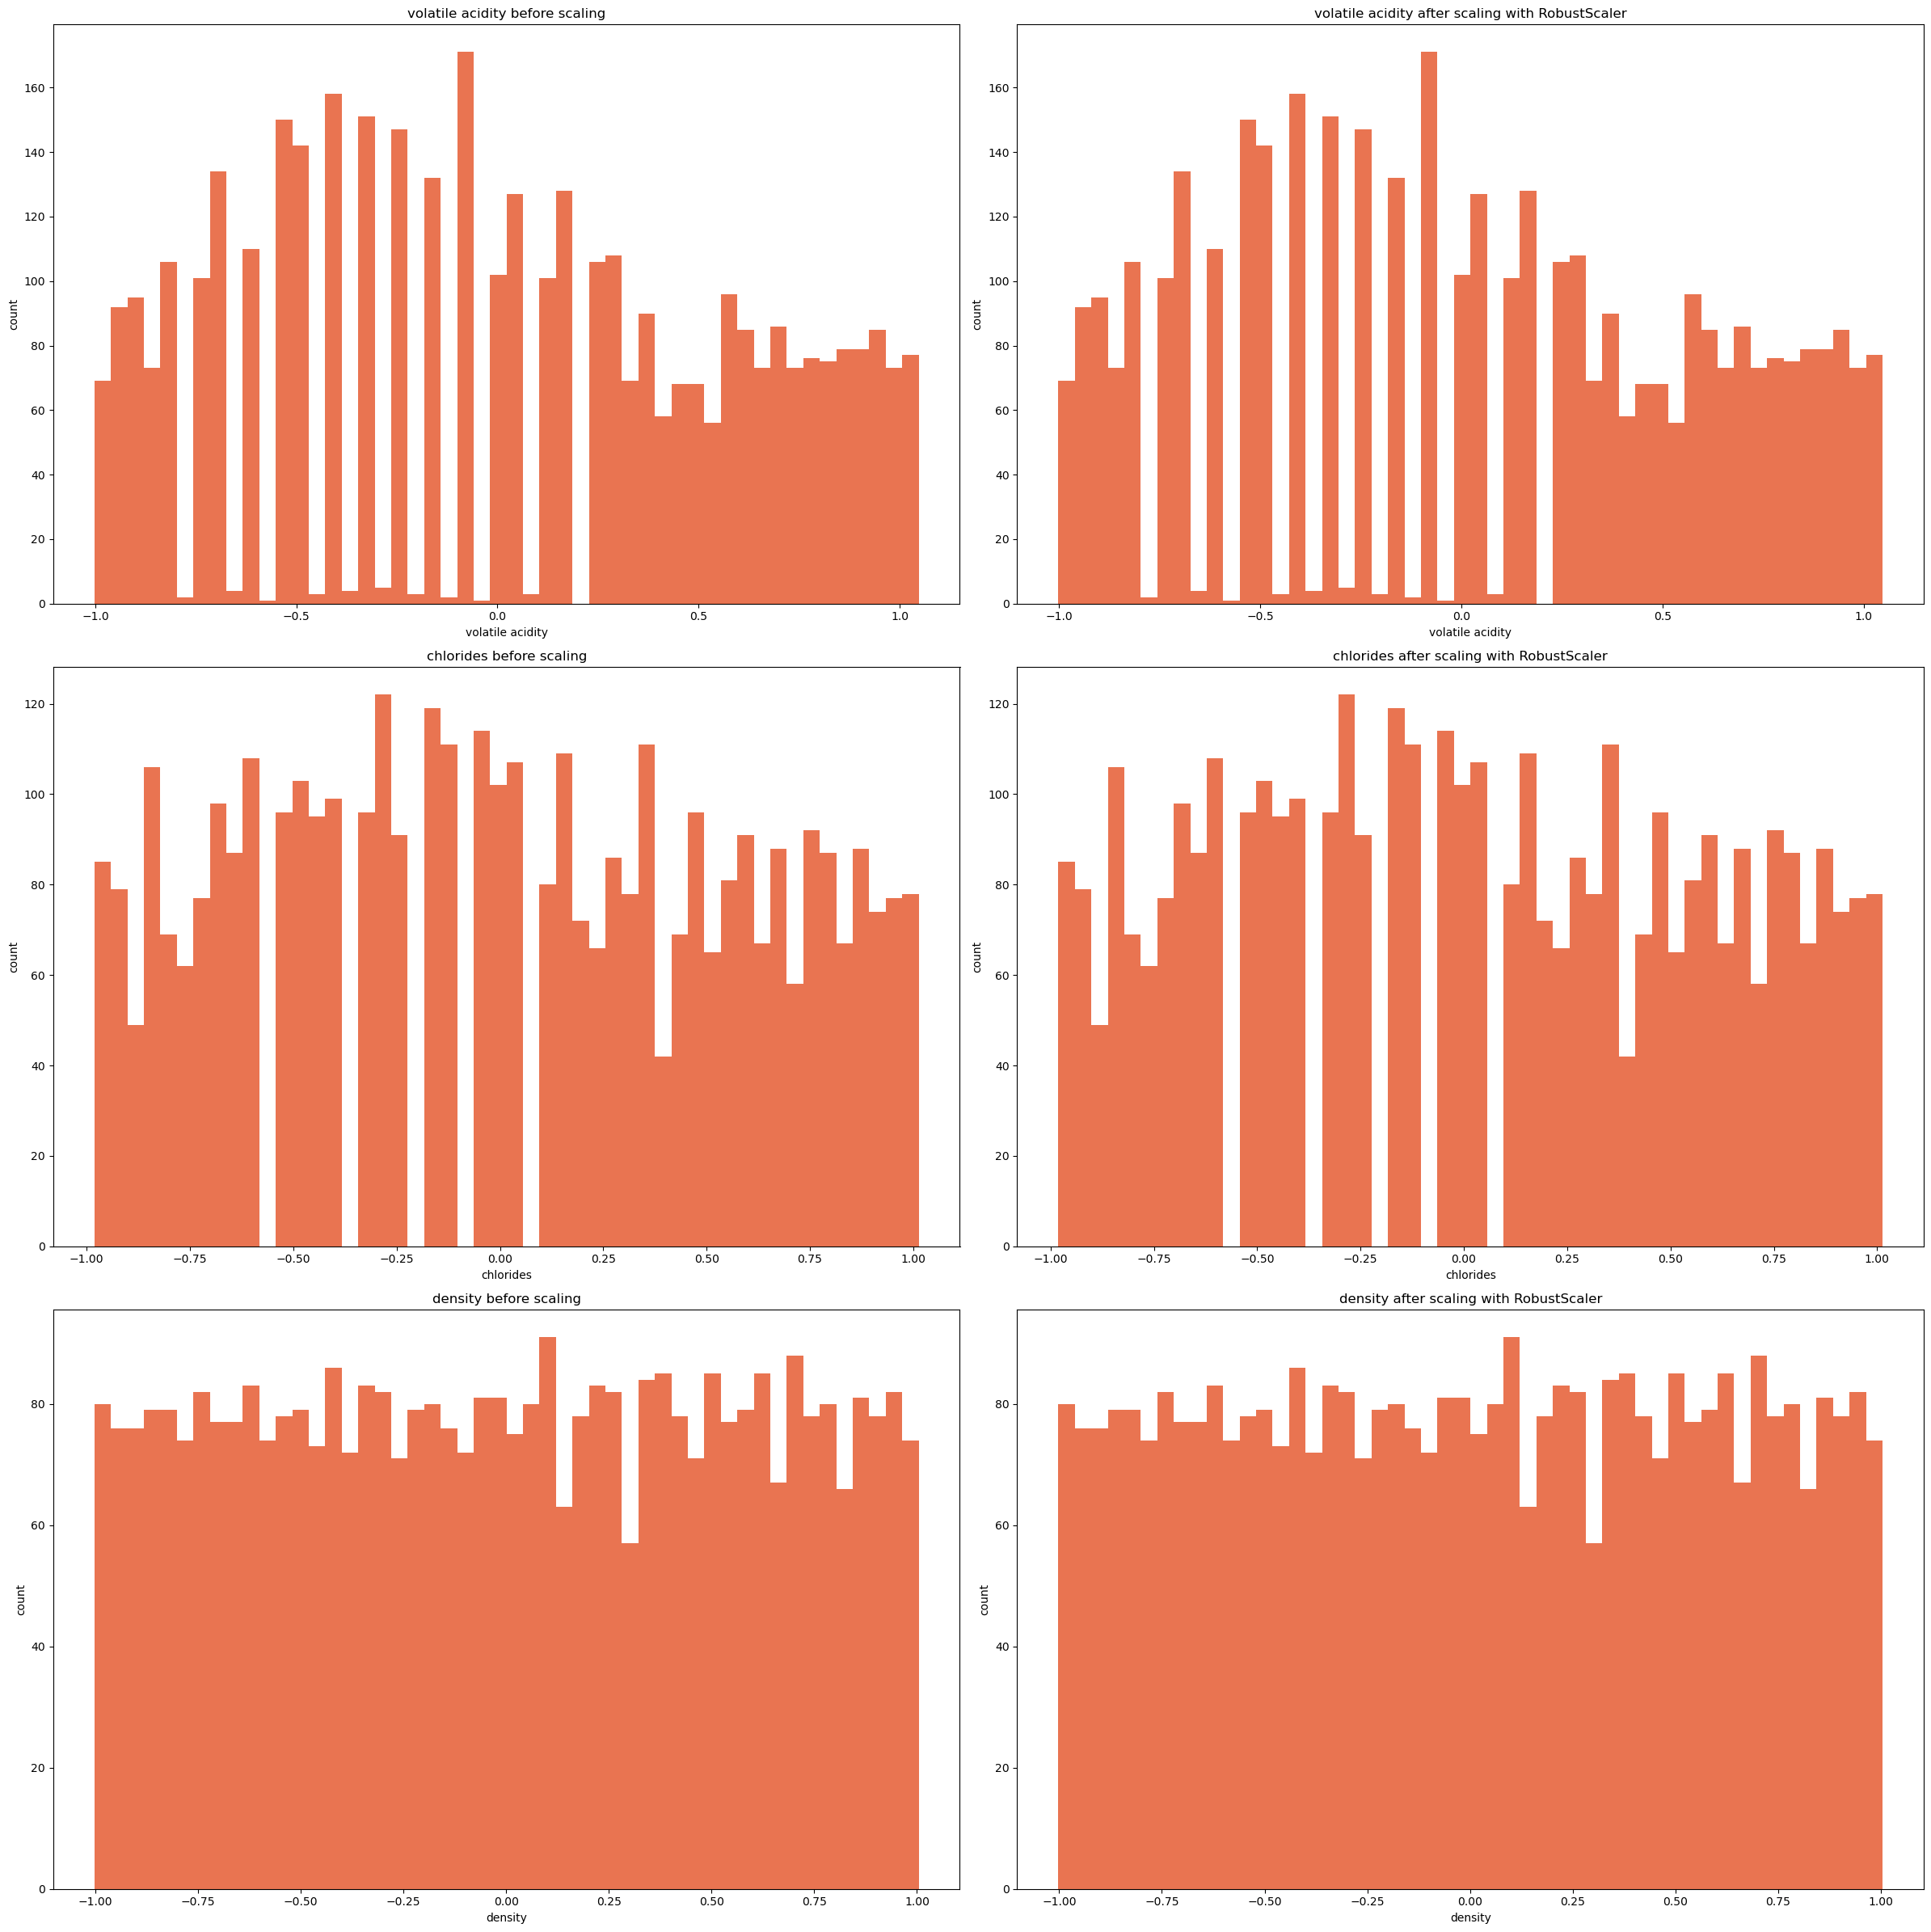

In [133]:
# call function with robustscaler
r_scaler = RobustScaler()
visualize_scaler(scaler=r_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

#### Takeaways - Scaling has a normal distribution Standard Scaler will be used for Clustering

## <Span style= 'color: #800020'>Final Questions 
1. <s>Does alcohol have a relationship with wine quality?</s> <span style='color:red'>removed question because feature redundant. Same as density 
1. Does density have a relationship with wine quality? 
3. Does chlorides have a relationship with wine quality?
3. Does volitale acidity have a relationship with wine quality?
4. Does category of wine "red or white" have a relationship to wine quality?

### <Span style= 'color: #800020'> FEATURE COMPARISON VISUALIZATIONS

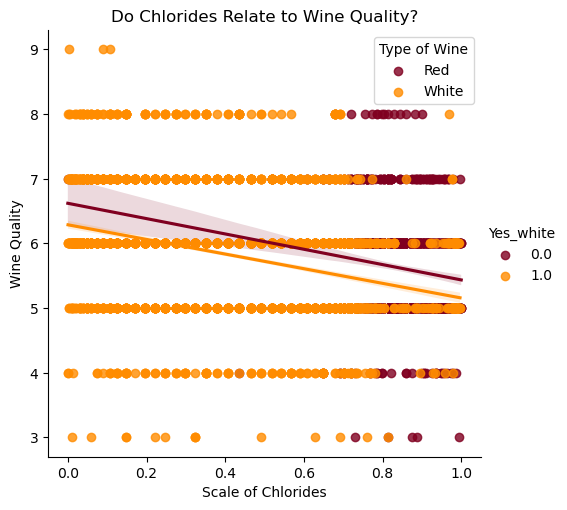

In [49]:
def chloride_lmplot(df):
    custom_palette = ['#800020', '#FF8C00']
    new_labels = {'0': 'Red', '1': 'White'}

    cl = sns.lmplot(x='chlorides', y='quality', data=wine_train, hue='Yes_white', palette=custom_palette)
    plt.xlabel('Scale of Chlorides')
    plt.ylabel('Wine Quality')
    plt.title('Do Chlorides Relate to Wine Quality?')


    # Rename the hue legend
    leg = plt.legend(title='Type of Wine')
    for t, label in zip(leg.texts, new_labels.values()):
        t.set_text(label)
    plt.show()

chloride_lmplot(wine_train)


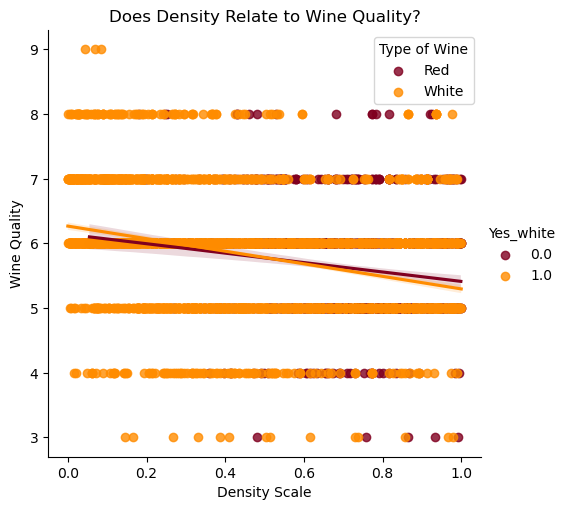

In [50]:
def density_lmplot(df):
    custom_palette = ['#800020', '#FF8C00']
    new_labels = {'0': 'Red', '1': 'White'}

    cl = sns.lmplot(x='density', y='quality', data=wine_train, hue='Yes_white', palette=custom_palette)
    plt.xlabel('Density Scale')
    plt.ylabel('Wine Quality')
    plt.title('Does Density Relate to Wine Quality?')


    # Rename the hue legend
    leg = plt.legend(title='Type of Wine')
    for t, label in zip(leg.texts, new_labels.values()):
        t.set_text(label)
    plt.show()

density_lmplot(wine_train)


Data visualization shows that the less Chlorides the better the wine quality 
The chloride content in wine is influenced by the terroir and grape variety. Quantification is essential as it significantly affects the wine's flavor, and high concentrations can lead to an undesirable salty taste and reduced market appeal. (Coli et al. 2015)

Coli, M. S., Rangel, A. G. P., Souza, E. S., Oliveira, M. F., & Chiaradia, A. C. N. (2015). Chloride concentration in red wines: influence of terroir and grape type. Food Science and Technology, 35, 95-99.

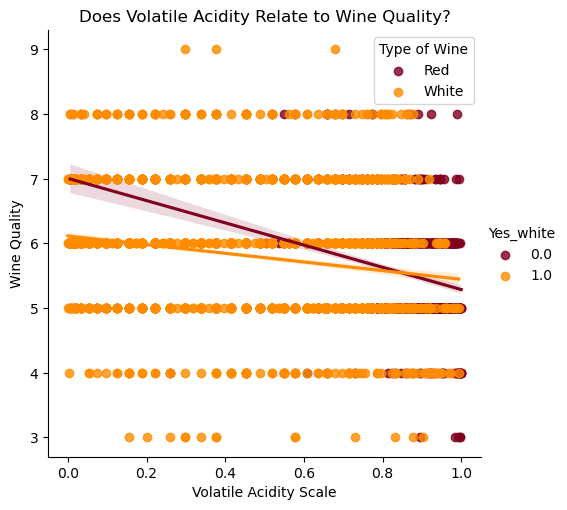

In [51]:
def acid_lmplot(df):
    custom_palette = ['#800020', '#FF8C00']
    new_labels = {'0': 'Red', '1': 'White'}

    cl = sns.lmplot(x='volatile acidity', y='quality', data=wine_train, hue='Yes_white', palette=custom_palette)
    plt.xlabel('Volatile Acidity Scale')
    plt.ylabel('Wine Quality')
    plt.title('Does Volatile Acidity Relate to Wine Quality?')


    # Rename the hue legend
    leg = plt.legend(title='Type of Wine')
    for t, label in zip(leg.texts, new_labels.values()):
        t.set_text(label)
    plt.show()
acid_lmplot(wine_train)

In [52]:
def vc_jplot():
    custom_palette = ['#800020','#FF8C00']
    vc = sns.jointplot(data=wine_train, x="volatile acidity", y="chlorides", hue="Yes_white", kind="hist", palette=custom_palette)
    plt.xlabel('Scale of Volatile Acidity')
    plt.ylabel('Scale of Chlorides')
    plt.title('Does Volatile Acidity and Chloride have Relation?')
    plt.tight_layout()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


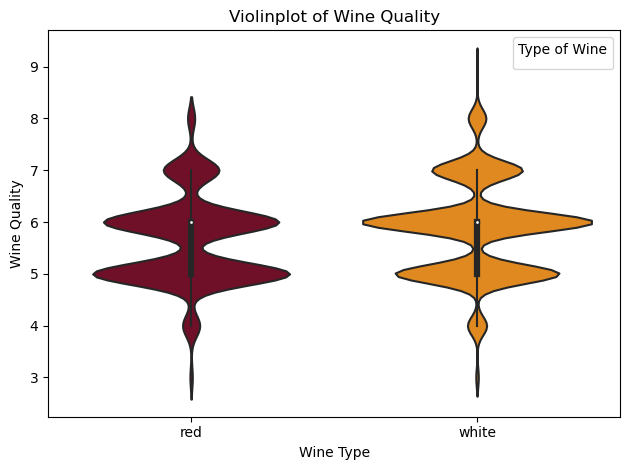

In [53]:
#violin plot of wine type vs quality

def plot_violinplot(df):
    custom_palette = ['#800020','#FF8C00']
    new_labels = {'0': 'Red', '1': 'White'}
    x = ['red', 'white']
    vp = sns.violinplot(x='Yes_white', y="quality", data=wine_train, palette=custom_palette)

# Relabel the x-axis ticks
    plt.xticks(range(len(x)), x)
    # Modify the legend labels
        # Rename the hue legend
    leg = plt.legend(title='Type of Wine')
#     for t, label in zip(leg.texts, new_labels.values()):
#         t.set_text(label)
   
    vp.set_xlabel('Wine Type')
    vp.set_ylabel('Wine Quality')
    plt.title('Violinplot of Wine Quality')
    plt.tight_layout()
    plt.show()
plot_violinplot(wine_train)


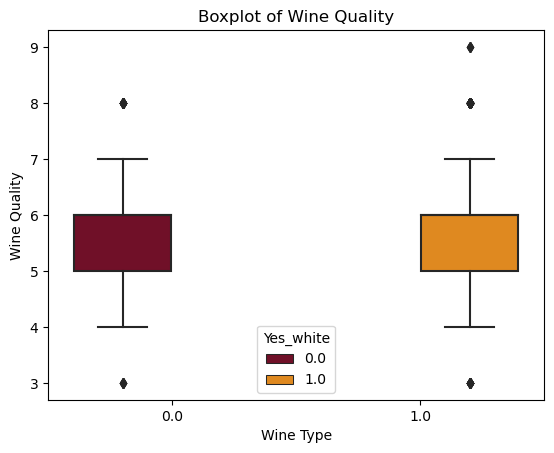

In [54]:
custom_palette = ['#800020','#FF8C00']
sns.boxplot(x='Yes_white', y="quality", data=wine_train, hue='Yes_white', palette=custom_palette)
plt.title('Boxplot of Wine Quality')
plt.xlabel('Wine Type')
plt.ylabel('Wine Quality')
plt.show()


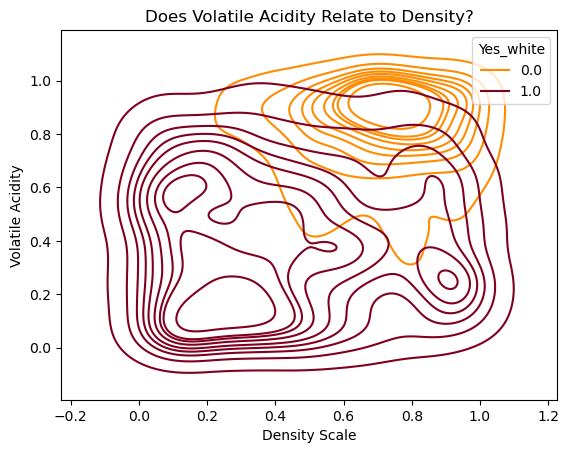

In [55]:
def wine_KDE():
    custom_palette = ['#FF8C00', '#800020']
    sns.kdeplot(data=wine_train, x='density', y='volatile acidity', hue='Yes_white',palette=custom_palette)
    plt.xlabel('Density Scale')
    plt.ylabel('Volatile Acidity')
    plt.title('Does Volatile Acidity Relate to Density?')
    plt.show()
wine_KDE()

## <Span style= 'color: #800020'>Questions using statistical testing 

In [56]:
wine_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
762             8.8          0.963964         0.00             1.7   0.780280   
2844            8.0          0.221221         0.31             5.6   0.543043   
3899            6.0          0.187688         0.30             8.7   0.196697   
1019            7.0          0.845846         0.14             1.8   0.844845   
3951            6.3          0.608609         0.20            17.9   0.761261   

      free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
762                   8.0                  19.0  0.755077  3.31       0.53   
2844                 24.0                  97.0  0.315315  3.10       0.42   
3899                 47.0                 127.0  0.383528  3.18       0.39   
1019                 10.0                  23.0  0.676176  3.53       0.61   
3951                 36.0                 161.0  0.941441  3.14       0.51   

      alcohol  quality  Yes_white  
762      10.0        6        0.0  
2844     10.9        5        1.0  
3899     10.6        5        1.0  
1019     10.4        5        0.0  
3951      8.8        5        1.0

In [57]:
to_scale = ['alcohol', 'chlorides', 'density','Yes_white']

In [58]:
alpha = .05

<Span style= 'color: #800020'>Hypothesis 1 - Pearson R

- alpha = .05
- H0 = Chlorides has no correlation with wine quality
- Ha = Chlorides is correlated with wine quality
- Outcome: We reject or accept the Null Hypothesis.

In [59]:
#chlorides stat
def chlorides_stat(wine_train, wine_validate, wine_test):
    alpha = 0.05
    train_r, train_p = pearsonr(wine_train.chlorides, wine_train.quality)
    validate_r, validate_p = pearsonr(wine_validate.chlorides, wine_validate.quality)
#     test_r, test_p = pearsonr(test.chlorides, test.quality)
    print('train_r:', train_r)
    print('train_p:',train_p)
    print('validate_r:', validate_r)
    print('validate_p:', validate_p)
    print(f'The p-value is less than the alpha: {validate_p < alpha}')
    if validate_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        
chlorides_stat(wine_train, wine_validate, wine_test)

train_r: -0.2794087305902656
train_p: 8.110788659141262e-71
validate_r: -0.23791639674779913
validate_p: 3.465430434167978e-18
The p-value is less than the alpha: True
Outcome: We reject the null


<Span style= 'color: #800020'>Hypothesis 2 - Pearson R

- alpha = .05
- H0 = Density has no correlation with wine quality
- Ha = Density is correlated with wine quality
- Outcome: We reject or accept the Null Hypothesis.

In [60]:
#density stat
from scipy.stats import pearsonr, spearmanr
def density_stat(wine_train, wine_validate, wine_test):
    alpha = 0.05
    train_r, train_p = pearsonr(wine_train.density, wine_train.quality)
    validate_r, validate_p = pearsonr(wine_validate.density, wine_validate.quality)
#     test_r, test_p = pearsonr(test.alcohol, test.quality)
    print('train_r:', train_r)
    print('train_p:',train_p)
    print('validate_r:', validate_r)
    print('validate_p:', validate_p)
    print(f'The p-value is less than the alpha: {validate_p < alpha}')
    if validate_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        
density_stat(wine_train, wine_validate, wine_test)

train_r: -0.30277255174618994
train_p: 2.0083280974295455e-83
validate_r: -0.2863945568864837
validate_p: 5.791435791024616e-26
The p-value is less than the alpha: True
Outcome: We reject the null


## <Span style= 'color: #800020'> Clustering using KMeans and Standard Scaler

In [61]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#Create X using volatiel_acid and density
X = wine_train[['volatile acidity', 'density','chlorides']]
X.head()


volatile acidity   density  chlorides
762           0.963964  0.755077   0.780280
2844          0.221221  0.315315   0.543043
3899          0.187688  0.383528   0.196697
1019          0.845846  0.676176   0.844845
3951          0.608609  0.941441   0.761261

In [62]:
# Scarler using X.columns
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

volatile acidity   density  chlorides
762           1.607692  0.883356   0.970976
2844         -0.965935 -0.639621   0.149079
3899         -1.082129 -0.403387  -1.050821
1019          1.198409  0.610107   1.194656
3951          0.376375  1.528769   0.905085

#### <Span style= 'color: #800020'> Determine k

In [ ]:
# Elbow approach for to determine K "Codeup instructor "
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x',color='#800020')
    plt.xticks(range(2, 12))
    plt.xlabel('Number of Clusters k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
   



#### <Span style= 'color: #800020'>We are going to go with "3" for k
### <Span style= 'color: #800020'>Create 3 cluster  models and visualize them 

In [64]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def create_cluster_models(wine_train, X, k):
    """Takes in df, X (dataframe with variables you want to cluster on), and k
    It scales the X, calculates the clusters, and returns the DataFrame (with clusters), 
    the scaled DataFrame, the scaler, kmeans object, and unscaled centroids as a DataFrame"""

    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values)
    
    #Model 1
    kmeans = KMeans(n_clusters=k, random_state=210)
    kmeans.fit(X_scaled[['volatile acidity', 'density']])
    centroids1 = pd.DataFrame((kmeans.cluster_centers_), columns=['volatile acidity', 'density'])
    # Add cluster columns to the X_scaled DataFrame
    X_scaled['cluster_M1'] = 'cluster_' + pd.Series(kmeans.predict(X_scaled[['volatile acidity', 'density']]).astype(str))
    
    #Model 2
    kmeans2 = KMeans(n_clusters=(k), random_state=210)
    kmeans2.fit(X_scaled[['volatile acidity', 'chlorides']])
    
    centroids2 = pd.DataFrame((kmeans2.cluster_centers_), columns=['volatile acidity', 'chlorides'])
    X_scaled['cluster_M2'] = 'cluster_' + pd.Series(kmeans2.predict(X_scaled[['volatile acidity', 'chlorides']]).astype(str))
    
    #Model 3 
    kmeans3 = KMeans(n_clusters=(k), random_state=210)
    kmeans3.fit(X_scaled[['chlorides', 'density']])
    centroids3 = pd.DataFrame((kmeans3.cluster_centers_), columns=['chlorides', 'density'])
    X_scaled['cluster_M3'] = 'cluster_' + pd.Series(kmeans3.predict(X_scaled[['chlorides', 'density']]).astype(str))
    

    
    # Create cluster Model graphs using features volatile acidity and density
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    sns.scatterplot(data=X_scaled, x='volatile acidity', y='density', hue='cluster_M1', palette='YlOrRd')
    centroids1.plot.scatter(x='volatile acidity', y='density', ax=plt.gca(), color='k', alpha=0.9, s=200, marker=(4, 1, 0), label='centroids')
    plt.title('Cluster Model 1')
    
    # Create cluster Model graphs using features volatile acidity and chlorides
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 2)
    sns.scatterplot(data=X_scaled, x='volatile acidity', y='chlorides', hue='cluster_M2', palette='YlOrRd')
    centroids2.plot.scatter(x='volatile acidity', y='chlorides', ax=plt.gca(), color='k', alpha=0.9, s=200, marker=(4, 1, 0), label='centroids')
    plt.title('Cluster Model 2')
    
    # Create cluster Model graphs using features chlorides and density
    plt.subplot(1, 3, 3)
    sns.scatterplot(data=X_scaled, x='chlorides', y='density', hue='cluster_M3', palette='YlOrRd')
    centroids3.plot.scatter(x='chlorides', y='density', ax=plt.gca(), color='k', alpha=0.9, s=200, marker=(4, 1, 0), label='centroids')
    plt.title('Cluster Model 3')
    plt.tight_layout()
    plt.show()
    
    return wine_train, X_scaled, scaler, kmeans, centroids1, centroids2, centroids3 

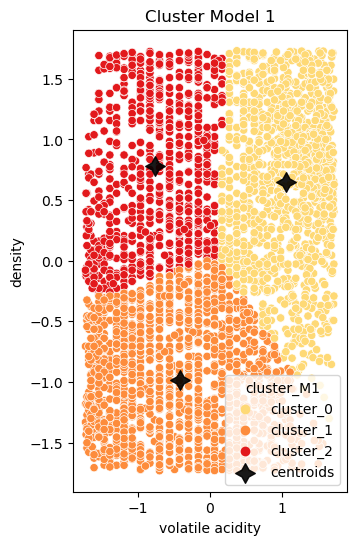

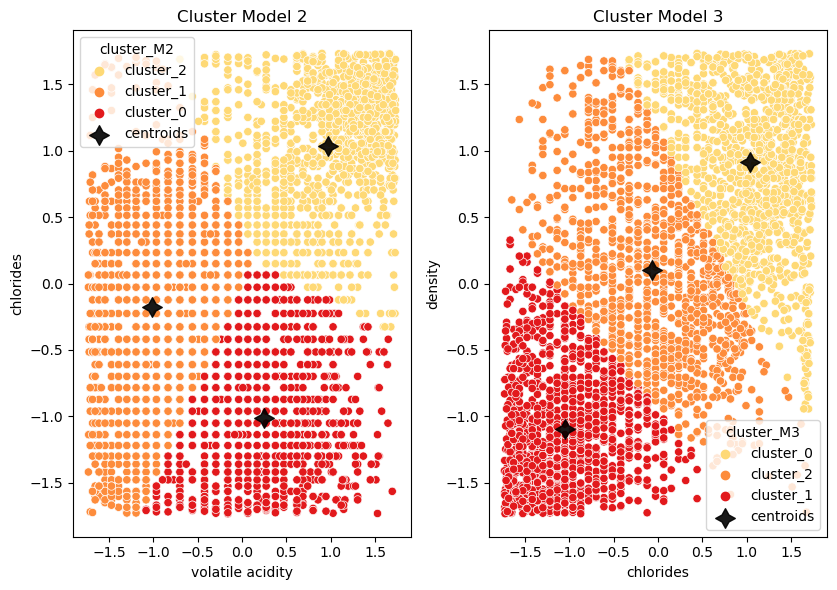

In [65]:
wine_train, X_scaled, scaler, kmeans, centroids1, centroids2, centroids3 = create_cluster_models(wine_train, X_scaled, 3)


In [66]:
# plot out volatile acidity vs density with regard to the cluster and age
def clusters_1():
    sns.relplot(data=X_scaled, x="volatile acidity", y="density", col="cluster_M1", hue="cluster_M1", col_wrap=2,palette='YlOrRd')
    X_scaled.cluster = X_scaled.cluster_M1.map({
        0: "density",
        1: "volatile acidity",
        2: "density_vacid"
    })
    plt.show()

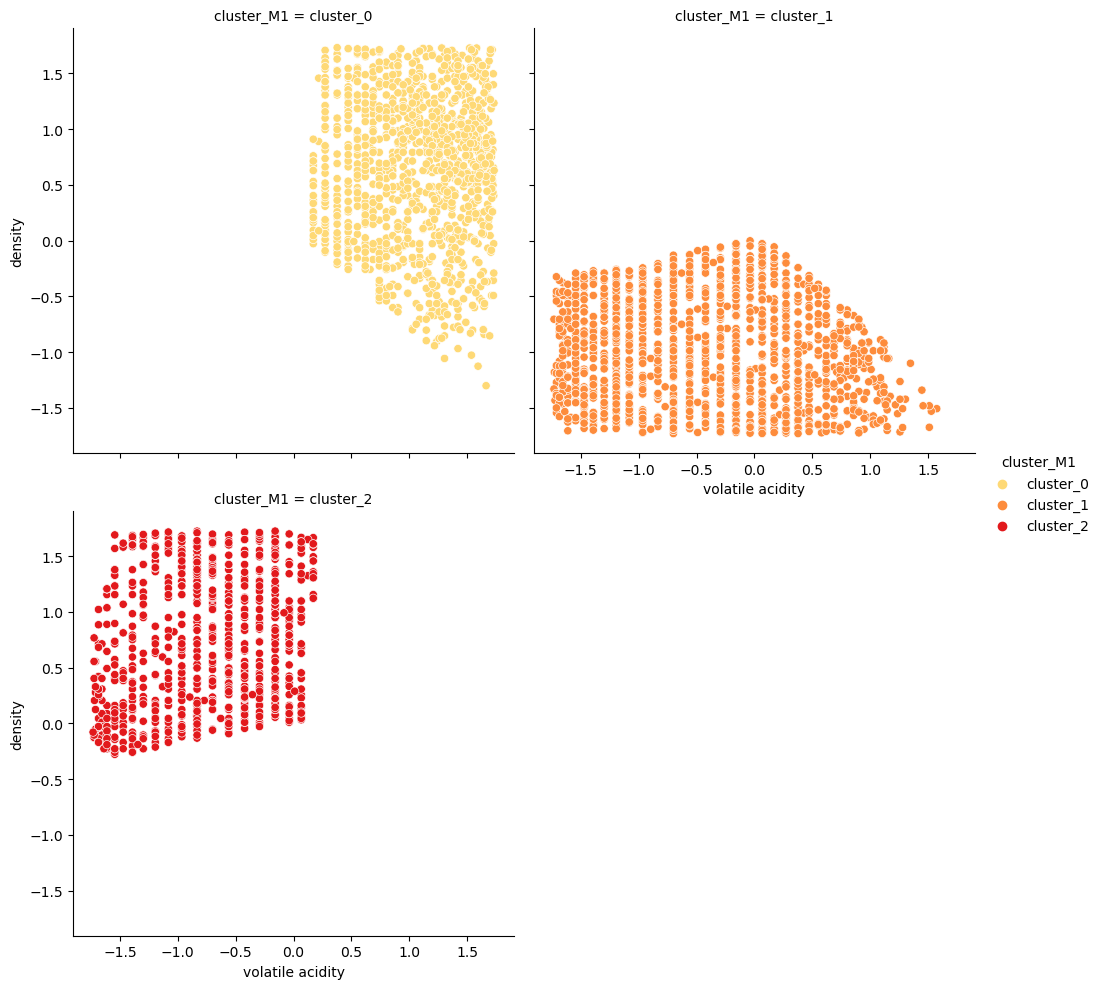

In [67]:
clusters_1()

In [68]:
X_scaled.head()

volatile acidity   density  chlorides cluster_M1 cluster_M2 cluster_M3
0          1.607692  0.883356   0.970976  cluster_0  cluster_2  cluster_0
1         -0.965935 -0.639621   0.149079  cluster_1  cluster_1  cluster_2
2         -1.082129 -0.403387  -1.050821  cluster_1  cluster_1  cluster_1
3          1.198409  0.610107   1.194656  cluster_0  cluster_2  cluster_0
4          0.376375  1.528769   0.905085  cluster_0  cluster_2  cluster_0

In [69]:
wine_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
762             8.8          0.963964         0.00             1.7   0.780280   
2844            8.0          0.221221         0.31             5.6   0.543043   
3899            6.0          0.187688         0.30             8.7   0.196697   
1019            7.0          0.845846         0.14             1.8   0.844845   
3951            6.3          0.608609         0.20            17.9   0.761261   

      free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
762                   8.0                  19.0  0.755077  3.31       0.53   
2844                 24.0                  97.0  0.315315  3.10       0.42   
3899                 47.0                 127.0  0.383528  3.18       0.39   
1019                 10.0                  23.0  0.676176  3.53       0.61   
3951                 36.0                 161.0  0.941441  3.14       0.51   

      alcohol  quality  Yes_white  
762      10.0        6        0.0  
2844     10.9        5        1.0  
3899     10.6        5        1.0  
1019     10.4        5        0.0  
3951      8.8        5        1.0

In [79]:
X_scaled.head()

volatile acidity   density  chlorides cluster_M1 cluster_M2 cluster_M3
0          1.607692  0.883356   0.970976  cluster_0  cluster_2  cluster_0
1         -0.965935 -0.639621   0.149079  cluster_1  cluster_1  cluster_2
2         -1.082129 -0.403387  -1.050821  cluster_1  cluster_1  cluster_1
3          1.198409  0.610107   1.194656  cluster_0  cluster_2  cluster_0
4          0.376375  1.528769   0.905085  cluster_0  cluster_2  cluster_0

In [80]:
wine_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
762             8.8          0.963964         0.00             1.7   0.780280   
2844            8.0          0.221221         0.31             5.6   0.543043   
3899            6.0          0.187688         0.30             8.7   0.196697   
1019            7.0          0.845846         0.14             1.8   0.844845   
3951            6.3          0.608609         0.20            17.9   0.761261   

      free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
762                   8.0                  19.0  0.755077  3.31       0.53   
2844                 24.0                  97.0  0.315315  3.10       0.42   
3899                 47.0                 127.0  0.383528  3.18       0.39   
1019                 10.0                  23.0  0.676176  3.53       0.61   
3951                 36.0                 161.0  0.941441  3.14       0.51   

      alcohol  quality  Yes_white  
762      10.0        6        0.0  
2844     10.9        5        1.0  
3899     10.6        5        1.0  
1019     10.4        5        0.0  
3951      8.8        5        1.0

In [81]:
X_scaled.groupby("cluster_M1").mean()

volatile acidity   density  chlorides
cluster_M1                                       
cluster_0           1.060384  0.644827   0.762613
cluster_1          -0.417844 -0.982428  -0.652972
cluster_2          -0.766277  0.781717   0.052705

In [82]:
X_scaled.groupby("cluster_M1").min()

volatile acidity   density  chlorides cluster_M2 cluster_M3
cluster_M1                                                             
cluster_0           0.169999 -1.301751  -1.730533  cluster_0  cluster_0
cluster_1          -1.732473 -1.731616  -1.732267  cluster_0  cluster_0
cluster_2          -1.732473 -0.277356  -1.668110  cluster_0  cluster_0

In [83]:
X_scaled.groupby("cluster_M1").max()

volatile acidity   density  chlorides cluster_M2 cluster_M3
cluster_M1                                                             
cluster_0           1.732558  1.731568   1.732184  cluster_2  cluster_2
cluster_1           1.574742 -0.001757   1.715505  cluster_2  cluster_2
cluster_2           0.169999  1.726164   1.722342  cluster_2  cluster_2

### <Span style= 'color: #800020'> Cluster Summary 
We felt cluster analysis did not provide distinct enough clusters for purposes of using in a regression model. Conduct DBSCAN cluster analysis because this method eliminates outliers, this may prove more useful in defining unique clusters of values
    

## <Span style= 'color: #800020'> Regression Modeling

In [84]:
def x_y_split(wine_train, wine_validate, wine_test):
    X_train, y_train = wine_train.drop(columns=['quality']), wine_train.quality
    X_validate, y_validate = wine_validate.drop(columns=['quality']), wine_validate.quality
    X_test, y_test = wine_test.drop(columns=['quality']), wine_test.quality
    return X_train, y_train, X_validate, y_validate, X_test, y_test 

In [85]:
X_train, y_train, X_validate, y_validate, X_test, y_test = x_y_split(wine_train, wine_validate, wine_test)

In [86]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
762             8.8          0.963964         0.00             1.7   0.780280   
2844            8.0          0.221221         0.31             5.6   0.543043   
3899            6.0          0.187688         0.30             8.7   0.196697   
1019            7.0          0.845846         0.14             1.8   0.844845   
3951            6.3          0.608609         0.20            17.9   0.761261   

      free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
762                   8.0                  19.0  0.755077  3.31       0.53   
2844                 24.0                  97.0  0.315315  3.10       0.42   
3899                 47.0                 127.0  0.383528  3.18       0.39   
1019                 10.0                  23.0  0.676176  3.53       0.61   
3951                 36.0                 161.0  0.941441  3.14       0.51   

      alcohol  Yes_white  
762      10.0        0.0  
2844     10.9        1.0  
3899     10.6        1.0  
1019     10.4        0.0  
3951      8.8        1.0

In [87]:
y_train.head()

762     6
2844    5
3899    5
1019    5
3951    5
Name: quality, dtype: int64

In [88]:
print(f"""Train shape: {X_train.shape}
Validate shape: {X_validate.shape}
Test shape: {X_test.shape}
""")

Train shape: (3897, 12)
Validate shape: (1300, 12)
Test shape: (1300, 12)



In [89]:
def wine_distplot():
    plt.hist(y_train.quality, color= 'brown')
    plt.title("Distribution of Target (Wine Quality)")
    plt.xlabel("Final algorithm distribution (Wine")
    plt.ylabel("Number of Features")
    plt.show()

The assumption of a normal distribution for the target variable, 'Wine Quality' makes it suitable for continuous target variables with a power of 0.

#### BASELINE 

In [90]:
y_train.mean()

5.791891198357711

In [91]:
y_train.median()

6.0

In [92]:
def baseline(y_train, y_validate):
    #  y_train and y_validate to be dataframes to append the new metric columns with predicted values. 
    y_train = pd.DataFrame(y_train)
    y_validate = pd.DataFrame(y_validate)

    # Baseline for mean 
    # 1. Predict quality_pred_mean  make columns for train and validate
    quality_pred_mean = y_train.quality.mean()
    y_train['quality_pred_mean'] = quality_pred_mean
    y_validate['quality_pred_mean'] = quality_pred_mean 

  # 3. RMSE of quality_pred_mean
    rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_mean) ** (.5)
    rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_mean) ** (.5)

    # create a df to easily view results of models
    metric_df = pd.DataFrame(data = [
        {
            'model': "mean_baseline",
            'RMSE_train': rmse_train,
            'RMSE_validate': rmse_validate,
            "R2_validate": explained_variance_score(y_validate.quality, y_validate.quality_pred_mean)
        }
    ])

    return y_train, y_validate, metric_df

In [93]:
y_train, y_validate, metric_df = baseline(y_train, y_validate)

In [94]:
y_train.head()

quality  quality_pred_mean
762         6           5.791891
2844        5           5.791891
3899        5           5.791891
1019        5           5.791891
3951        5           5.791891

In [95]:
metric_df

model  RMSE_train  RMSE_validate  R2_validate
0  mean_baseline    0.878889       0.875914          0.0

In [96]:
# plot to visualize actual vs predicted. 
def act_vs_pred():
    plt.hist(y_train.quality, color='brown', alpha=.5, label="Actual Wine Quality")
    plt.hist(y_train.quality_pred_mean, bins=1, color='red', alpha=.5,  label="Predicted Wine Quality - Mean")
    #plt.hist(y_train.quality_pred_median, bins=1, color='orange', alpha=.5, label="Predicted Wine Quality - Median")
    plt.xlabel("Final Wine Quality Score (quality)")
    plt.ylabel("Number of Observations")
    plt.legend()
    plt.show()

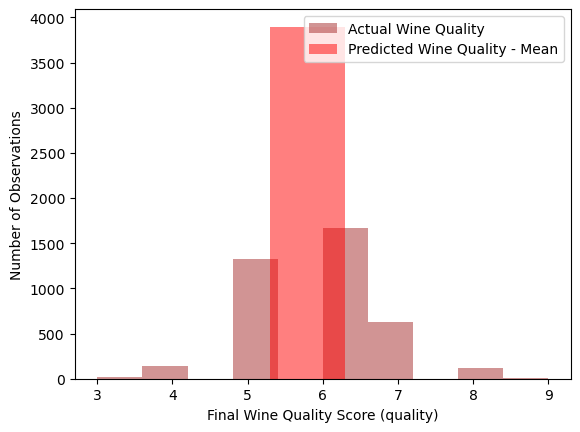

In [97]:
act_vs_pred()

In [98]:
def ols_lasso_tweedie_poly(X_train, X_validate, y_train, y_validate, metric_df):
    ''' This function runs OLS, Lasso and Tweedie Regression models at once'''
    #---OLS------
    # make and fit OLS model
    lm = LinearRegression()

    OLSmodel = lm.fit(X_train, y_train.quality)

    # make a prediction and save it to the y_train
    y_train['quality_pred_ols'] = lm.predict(X_train)

    #evaluate RMSE
    rmse_train_ols = mean_squared_error(y_train.quality, y_train.quality_pred_ols) ** .5

    # predict validate
    y_validate['quality_pred_ols'] = lm.predict(X_validate)

    # evaluate RMSE for validate
    rmse_validate_ols = mean_squared_error(y_validate.quality, y_validate.quality_pred_ols) ** .5

    #append metric
    metric_df = metric_df.append({
        'model': 'ols',
        'RMSE_train': rmse_train_ols,
        'RMSE_validate': rmse_validate_ols,
        'R2_validate': explained_variance_score(y_validate.quality, y_validate.quality_pred_ols)    
    }, ignore_index=True)

    print(f"""RMSE for OLS using LinearRegression
        Training/In-Sample:  {rmse_train_ols:.2f} 
        Validation/Out-of-Sample: {rmse_validate_ols:.2f}\n""")


    #------LassoLars----------
    # make and fit Lasso+Lars model
    lars = LassoLars(alpha=0.01)

    Larsmodel = lars.fit(X_train, y_train.quality)

    # make a prediction and save it to the y_train
    y_train['quality_pred_lars'] = lars.predict(X_train)

    #evaluate RMSE
    rmse_train_lars = mean_squared_error(y_train.quality, y_train.quality_pred_lars) ** .5

    # predict validate
    y_validate['quality_pred_lars'] = lars.predict(X_validate)

    # evaluate RMSE for validate
    rmse_validate_lars = mean_squared_error(y_validate.quality, y_validate.quality_pred_lars) ** .5

    #append metric
    metric_df = metric_df.append({
        'model': 'lasso_alpha0.01',
        'RMSE_train': rmse_train_lars,
        'RMSE_validate': rmse_validate_lars,
        'R2_validate': explained_variance_score(y_validate.quality, y_validate.quality_pred_lars)    
    }, ignore_index=True)

    print(f"""RMSE for LassoLars
        Training/In-Sample:  {rmse_train_lars:.2f} 
        Validation/Out-of-Sample: {rmse_validate_lars:.2f}\n""")

    #-----------Tweedie Model--------
    # make and fit Tweedie model
    tr = TweedieRegressor(power=0, alpha=1.0)

    Tweediemodel = tr.fit(X_train, y_train.quality)

    # make a prediction and save it to the y_train
    y_train['quality_pred_tweedie'] = tr.predict(X_train)

    #evaluate RMSE
    rmse_train_tweedie = mean_squared_error(y_train.quality, y_train.quality_pred_tweedie) ** .5

    # predict validate
    y_validate['quality_pred_tweedie'] = tr.predict(X_validate)

    # evaluate RMSE for validate
    rmse_validate_tweedie = mean_squared_error(y_validate.quality, y_validate.quality_pred_tweedie) ** .5

    # append metric
    metric_df = metric_df.append({
        'model': 'tweedie_power0_alpha1.0',
        'RMSE_train': rmse_train_tweedie,
        'RMSE_validate': rmse_validate_tweedie,
        'R2_validate': explained_variance_score(y_validate.quality, y_validate.quality_pred_tweedie)    
    }, ignore_index=True)

    print(f"""RMSE for TweedieRegressor
        Training/In-Sample:  {rmse_train_tweedie:.2f} 
        Validation/Out-of-Sample: {rmse_validate_tweedie:.2f}\n""")
    
    #----------Polynomial--------------
    #1. Create the polynomial features to get a new set of features
    pf = PolynomialFeatures(degree=2) #Quadratic aka x-squared
    
    #2. Fit and transform X_train_scaled
    X_train_degree2 = pf.fit_transform(X_train)
    
    #3. Transform X_validate_scaled & X_test_scaled 
    X_validate_degree2 = pf.transform(X_validate)
    X_test_degree2 = pf.transform(X_test)
    
    
    #2.1 MAKE THE THING: create the model object
    poly = LinearRegression()
    
    #2.2 FIT THE THING: fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    poly.fit(X_train_degree2, y_train.quality)
    
    #3. USE THE THING: predict train
    y_train['quality_pred_poly'] = poly.predict(X_train_degree2)
    
    #4. Evaluate: rmse
    poly_rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_poly) ** .5
    
    #5. REPEAT STEPS 3-4
    
    # predict validate
    y_validate['quality_pred_poly'] = poly.predict(X_validate_degree2)
    
    # evaluate: rmse
    poly_rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_poly) ** .5
    
    print(f"""RMSE for Polynomial Model, degrees=2
    Training/In-Sample:  {poly_rmse_train:.2f}
    Validation/Out-of-Sample:  {poly_rmse_validate:.2f}\n""")
    #Append
    metric_df = metric_df.append({
        "model":"poly_alpha.2",
        "RMSE_train": poly_rmse_train,
        "RMSE_validate": poly_rmse_validate,
        "R2_validate": explained_variance_score(y_validate.quality, y_validate.quality_pred_poly)
    }, ignore_index=True)
    return y_train, y_validate, metric_df

In [99]:
y_train, y_validate, metric_df = ols_lasso_tweedie_poly(X_train, X_validate, y_train, y_validate, metric_df)

RMSE for OLS using LinearRegression
        Training/In-Sample:  0.74 
        Validation/Out-of-Sample: 0.90

RMSE for LassoLars
        Training/In-Sample:  0.75 
        Validation/Out-of-Sample: 0.76

RMSE for TweedieRegressor
        Training/In-Sample:  0.79 
        Validation/Out-of-Sample: 0.79

RMSE for Polynomial Model, degrees=2
    Training/In-Sample:  0.68
    Validation/Out-of-Sample:  1.34



In [100]:
metric_df

model  RMSE_train  RMSE_validate  R2_validate
0            mean_baseline    0.878889       0.875914     0.000000
1                      ols    0.736087       0.903750     0.096732
2          lasso_alpha0.01    0.745618       0.762475     0.244220
3  tweedie_power0_alpha1.0    0.786750       0.793920     0.177234
4             poly_alpha.2    0.683047       1.342439    -0.254098

In [112]:
def lasso_test_model(X_train, y_train, X_test, y_test):
    # Convert y_test Series to a df
    y_test = pd.DataFrame(y_test)
    
    lars = LassoLars(alpha=0.01)
    
    LarsTest = lars.fit(X_test, y_test.quality)
    # USE THE THING: predict on test
    y_test['quality_pred_lars'] = lars.predict(X_test)
    
    # Evaluate: rmse
    rmse_test = mean_squared_error(y_test.quality, y_test.quality_pred_lars) ** (.5)
    
    print(f"""RMSE for LassoLars alpha=0.01
    Out-of-Sample Performance: {rmse_test:.2f}
    Baseline: {y_train.quality.mean():.2f}\n""")
    

In [113]:
lasso_test_model(X_train, y_train, X_test, y_test)

RMSE for LassoLars alpha=0.01
    Out-of-Sample Performance: 0.72
    Baseline: 5.79



In [106]:
def plt_regmods(y_train):
    plt.figure(figsize=(16,8))
    #actual vs mean
    plt.plot(y_validate.quality, y_validate.quality_pred_mean, alpha=.5, color="gray", label='_nolegend_')
    plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
    
    #actual vs. actual
    plt.scatter(y_validate.quality, y_validate.quality, alpha=0.5, cmap="autumn", label='_nolegend_')
    plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
    
    #actual vs. LinearReg model
    plt.scatter(y_validate.quality, y_validate.quality_pred_ols, 
               alpha=.5, color="red", s=100, label="Model: LinearRegression")
    # #actual vs. LassoLars model
    # plt.scatter(y_validate.quality, y_validate.quality_pred_lars, 
    #             alpha=.5, color="purple", s=100, label="Model: Lasso Lars")
    #actual vs. Tweedie/GenLinModel
    plt.scatter(y_validate.quality, y_validate.quality_pred_tweedie, 
               alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
    # #actual vs. PolynomReg/Quadratic
    # plt.scatter(y_validate.quality, y_validate.quality_pred_poly, 
    #             alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
    plt.legend()
    plt.xlabel("Actual Wine Quality")
    plt.ylabel("Predicted Wine Quality")
    plt.title("Where are predictions more extreme? More modest?")
    plt.show()

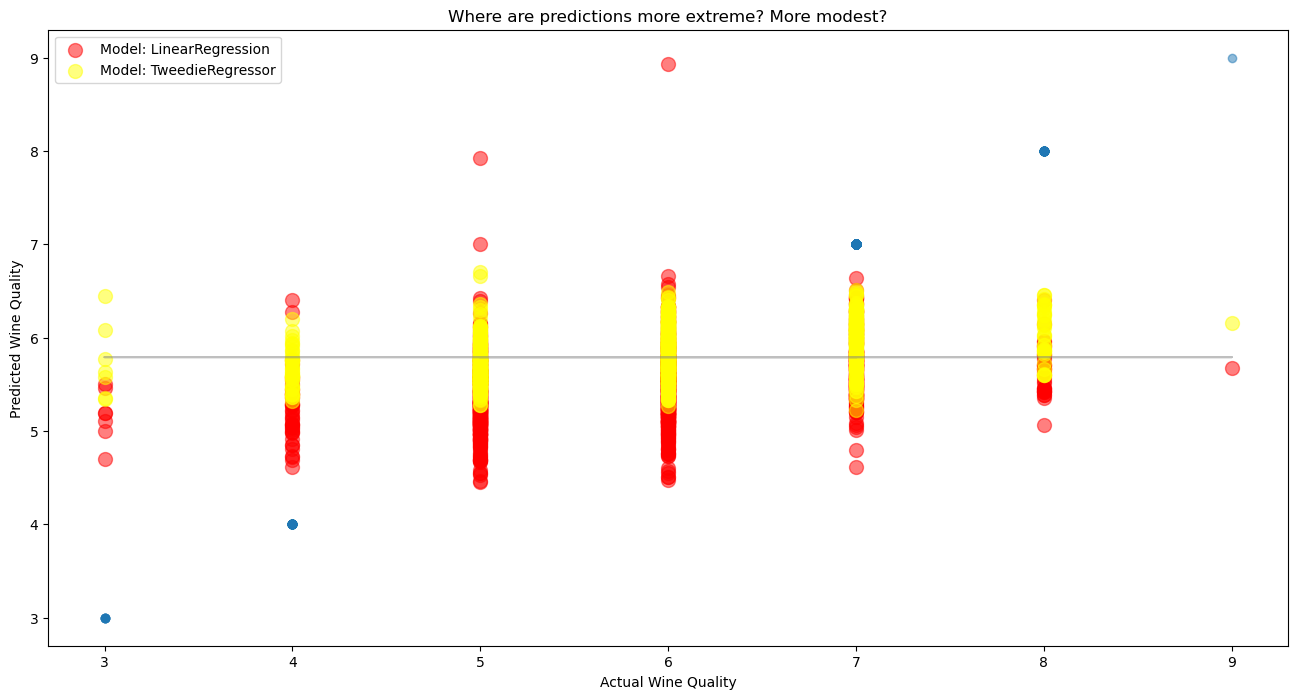

In [107]:
plt_regmods(y_train)

In [109]:
def hist_mods(y_train):
    # plot to visualize actual vs predicted. 
    plt.figure(figsize=(16,8))
    
    plt.hist(y_validate.quality, color='orange', alpha=.5, label="Actual Wine Quality ")
    # plt.hist(y_validate.quality_pred_ols, color='red', alpha=.5, label="Model: LinearRegression")
    # plt.hist(y_validate.quality_pred_lars, color='purple', alpha=.5, label="Model: Lasso Lars")
    plt.hist(y_validate.quality_pred_tweedie, color='yellow', alpha=.5, label="Model: TweedieRegressor")
    # plt.hist(y_validate.quality_pred_poly, color='green', alpha=.5, label="Model 2nd degree Polynomial")
    
    plt.xlabel("Actual Wine Quality")
    plt.ylabel("Number of Observations")
    plt.title("Comparing the Distribution of Actual Wine Quality to Distributions of Predicted Wine Quality for the Top Models")
    plt.legend()
    plt.show()

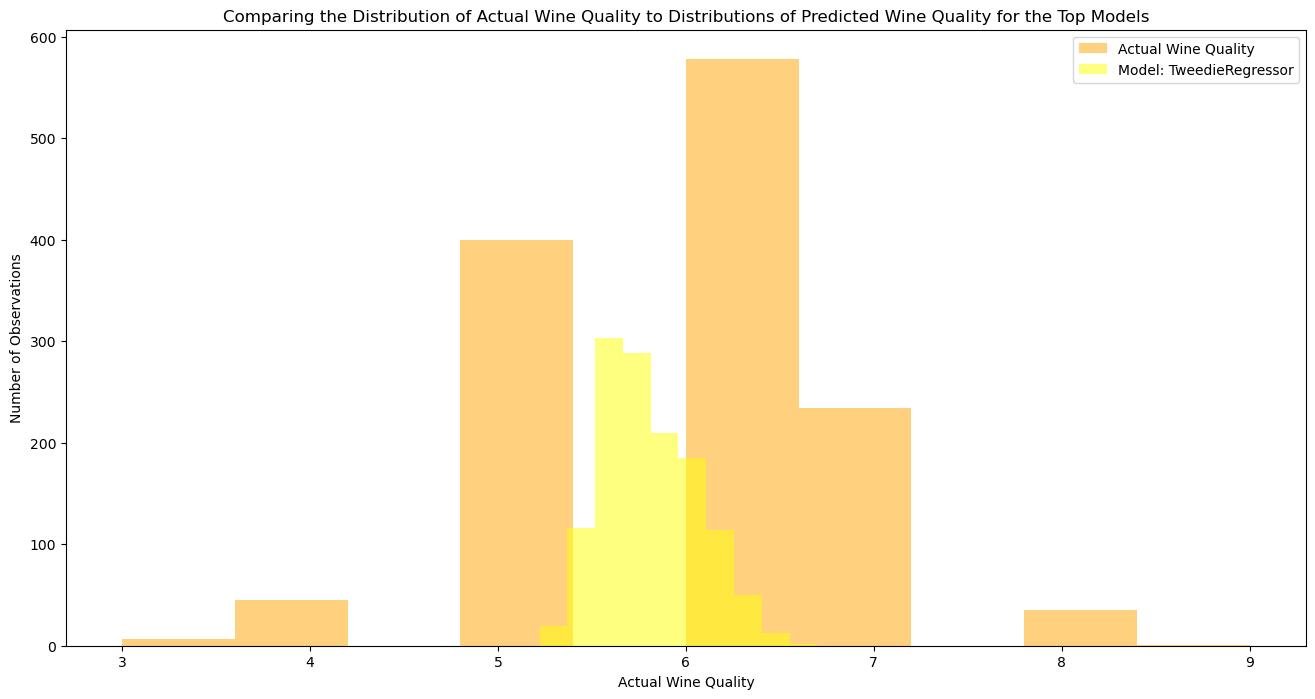

In [110]:
hist_mods(y_train)

### Additional testing for future

## <Span style= 'color: #800020'> Cluster Regression Model

In [141]:
# from sklearn.preprocessing import StandardScaler
# C = df_wine[['volatile acidity', 'density','chlorides','quality']]
# scaler = StandardScaler().fit(C)
# C_scaled = pd.DataFrame(scaler.transform(C), columns= C.columns).set_index([C.index.values])

# C_scaled.shape

# def C_split(df):
#     df= C_scaled
#     C_train, C_test = train_test_split(C_scaled, test_size=0.2, random_state=210)
#     C_train, C_validate = train_test_split(C_train, test_size=0.25, random_state=210)   
#     return C_train, C_validate, C_test

#  C_train, C_validate , C_test = C_split(C_scaled)

# C_train.shape, C_validate.shape , C_test.shape

# C_train.head()

# C_train.density.min(), C_train.density.max()

# #split into my X_train and y_train
# X_train = C_train[['volatile acidity', 'density']]
# y_train = C_train[['quality']]

# X_validate = C_validate[['volatile acidity', 'density']]
# y_validate = C_validate[['quality']]

# X_test = C_test[['volatile acidity', 'density']]
# y_test = C_test[['quality']]



# C_train.density.min(), C_scaled.density.max()